# Анализ юнит-экономики Procrastinate Pro+
Автор: Юрий Кузнецов

Дата: 07.07.2025

## 🌟 Введение  

В данном проекте проводится глубокий анализ юнит-экономики развлекательного приложения **Procrastinate Pro+**. Несмотря на запуск нового спортивного контента и обновлённую маркетинговую стратегию, компания столкнулась с **📉 стагнацией выручки** при общем росте интереса к продукту. Цель исследования — выявить причины этого противоречия и определить пути восстановления роста.  

### 🔑 Ключевые аспекты исследования:  

1. **🏢 Бизнес-контекст**  
   - ⚽️ Запуск спортивного контента для расширения аудитории (пользователи ЗОЖ и спорта)  
   - 📣 Корректировка маркетинговой стратегии привлечения  
   - 💰 Бизнес-модель требует окупаемости юнитов за первые **28 дней**  

2. **❗ Проблема**  
   - 📈➡️📉 Рост интереса ≠ рост выручки  
   - ⏸️ Стагнация выручки после изменений  

3. **🎯 Задачи анализа**  
   - 📊 Оценить динамику юнит-экономики (LTV, CAC, ROI) за 28 дней  
   - ↔️ Сравнить эффективность каналов привлечения  
   - ⚽💰 Определить окупаемость привлечения пользователей на спорт-контент  
   - 🚫 Выявить "убыточные" источники трафика  
   - 💡 Дать рекомендации по оптимизации бюджета  

### 🔬 Методология:  
Анализ будет включать:  
- 🧮 Расчет метрик:  
  - **LTV** (Lifetime Value)  
  - **CAC** (Customer Acquisition Cost)  
  - **Retention Rate**  
  - **ROI**  
- 🔄 Сравнение поведения пользователей до и после запуска спортивного контента  
- 🗂️ Сегментацию по:  
  - 🔗 Источникам привлечения  
  - 📅 Когортам по дате привлечения  

*✨ Фокус: Понимание того, почему корректировка инвестиции в каналы и новый контент не конвертировались в ожидаемую монетизацию.*

### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузим данные и получим основную информацию о них. Проведем необходимую предобработку

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import PercentFormatter

In [2]:
# Загрузим данные и сохраним в датасеты 
visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

<div class="alert alert-info"> сделал отдельными кодами ниже, но на будущее учу, так проще. Спасибо

- **Датасет visits**

In [3]:
# Выводим первые 5 строк датасета
visits.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [4]:
# Выводим информацию
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


Поля `session_start` и `session_end` необходимо привести к типу даты.  

In [5]:
# Преобразуем поля с датой к типу даты
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
# Посмотрим в каком периоде представлены данные
print("Диапазон дат в visits:",
      visits['session_start'].min(), "-", visits['session_start'].max())

Диапазон дат в visits: 2024-04-01 00:07:00 - 2024-11-30 23:59:00


In [7]:
# Проверяем наличие дубликатов
print(visits.duplicated().sum())

0


- **Датасет orders**

In [8]:
# Выводим первые 5 строк датасета
orders.head()

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [9]:
# Выводим информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


Поле `event_dt` необходимо привести к типу даты.

In [10]:
# Преобразуем поля с датой к типу даты
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [11]:
# Посмотрим в каком периоде представлены данные
print("Диапазон дат в orders:",
      orders['event_dt'].min(), "-", orders['event_dt'].max())

Диапазон дат в orders: 2024-04-01 00:53:40 - 2024-11-30 23:55:50


In [12]:
# Проверяем наличие дубликатов
print(orders.duplicated().sum())

0


- **Датасет costs**

In [13]:
# Выводим первые 5 строк датасета
costs.head()

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [14]:
# Выводим информацию
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


Поле `dt` необходимо привести к типу даты.

In [15]:
# Преобразуем поля с датой к типу даты
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
# Посмотрим в каком периоде представлены данные
print("Диапазон дат в costs:",
      costs['dt'].min(), "-", costs['dt'].max())

Диапазон дат в costs: 2024-04-01 - 2024-11-30


In [17]:
# Проверяем наличие дубликатов
print(costs.duplicated().sum())

0


- **Проверка пересечений**

In [18]:
# Проверяем, все ли каналы из orders есть в costs
channels_in_costs = set(costs['channel'].unique())
channels_in_visits = set(visits['channel'].unique())

missing_channels = channels_in_costs - channels_in_visits
if missing_channels:
    print(f"Предупреждение: В orders есть каналы, отсутствующие в profiles: {missing_channels}")
else:
    print("✅ Все каналы в orders присутствуют в profiles")

✅ Все каналы в orders присутствуют в profiles


In [19]:
# Проверяем все ли пользователи совершившие покупки есть в таблице с событиями
users_in_orders = set(orders['user_id'].unique())
users_in_visits = set(visits['user_id'].unique())

# Находим пользователей, которые есть в orders, но отсутствуют в visits
missing_users = users_in_orders - users_in_visits

if missing_users:
    print(f"⚠️ Внимание: {len(missing_users)} пользователей совершили покупки, но отсутствуют в visits")
    print(f"Пример таких user_id: {list(missing_users)[:5]}")
    print(f"Доля проблемных пользователей: {len(missing_users)/len(users_in_orders):.2%}")
else:
    print("✅ Все пользователи из orders присутствуют в visits")

✅ Все пользователи из orders присутствуют в visits


### 📊 **Промежуточный вывод**

✅ **Загрузка и предобработка данных завершена**. Получены 3 датасета:  
1. 📁 `visits` - информация о посещениях и пользователях  
2. 💳 `orders` - информация о покупках  
3. 📊 `costs` - информация о затратах на маркетинг  

🔍 **Во всех датасетах**:  
- ✔️ Пропусков нет  
- ✔️ Названия корректны  
- ✔️ Типы данных преобразованы  
- ✔️ Дубликатов нет  
- ✔️ Период апрель-ноябрь(включительно)
- ✔️ Источники привлечения и пользователи согласованы

✨ **Качество данных подтверждено для дальнейшего анализа**

In [20]:
print(f"visits: строк {visits.shape[0]}, столбцов {visits.shape[1]}")
print(f"orders: строк {orders.shape[0]}, столбцов {orders.shape[1]}")
print(f"costs: строк {costs.shape[0]}, столбцов {costs.shape[1]}")

visits: строк 161865, столбцов 6
orders: строк 33893, столбцов 3
costs: строк 976, столбцов 3


## Подготовка данных к когортному анализу

Подготовим данные к когортному анализу с учётом того, что мы будем изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдем:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраним в новой таблице `profiles`.

In [21]:
# Сортируем по дате для нахождения первого канала 
visits = visits.sort_values(by=['user_id', 'session_start'])

# Создаем таблицу profiles
profiles = visits.groupby('user_id').agg(
    first_dt=('session_start', 'min'), 
    first_channel=('channel', 'first')                
).reset_index()

# Преобразуем дату в формат date (без времени)
profiles['first_dt'] = profiles['first_dt'].dt.date

# Группируем по первой дате и каналлу для посчета пользователей
profiles_group = profiles.groupby(['first_dt', 'first_channel'])['user_id'].nunique().reset_index(name='user_count')

# Объединяем с costs и рассчитываем затраты по каналлам на привлечение одного пользователя
profiles_group_costs = pd.merge(
    profiles_group, 
    costs, 
    left_on = ['first_dt', 'first_channel'], 
    right_on = ['dt', 'channel'],
    how = 'left')

# Рассчитываем `CAC` на одного пользователя для каждой даты и каналла
profiles_group_costs['CAC'] = profiles_group_costs['costs']/profiles_group_costs['user_count']

# Добавляем поле `CAC` для каждого пользователя в таблицу profiles
profiles = pd.merge(profiles, profiles_group_costs[['first_channel', 'first_dt', 'CAC']], on = ['first_channel', 'first_dt'], how = 'left')

In [22]:
# Добавим к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из таблицы profiles
visits = pd.merge(visits, profiles, on = 'user_id', how = 'left')
orders = pd.merge(orders, profiles, on = 'user_id', how = 'left')

# Рассчитаем дневной lifetime как разность между событием и датой первой сессии
visits['first_dt'] = pd.to_datetime(visits['first_dt'])
visits['lifetime'] = (visits['session_start'] - visits['first_dt']).dt.days
orders['first_dt'] = pd.to_datetime(orders['first_dt'])
orders['lifetime'] = (orders['event_dt'] - orders['first_dt']).dt.days
visits.head(10)

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,CAC,lifetime
0,26034876,India,tv,FaceBoom,2024-05-29 10:24:00,2024-05-29 10:51:00,2024-05-29,FaceBoom,0.953250,0
1,69890364,India,mobile,RocketSuperAds,2024-06-28 05:48:00,2024-06-28 07:30:00,2024-06-28,RocketSuperAds,0.604917,0
2,75610104,India,mobile,FaceBoom,2024-06-09 06:48:00,2024-06-09 07:00:00,2024-06-09,FaceBoom,1.196159,0
3,76692397,India,mobile,FaceBoom,2024-10-21 01:51:00,2024-10-21 01:59:00,2024-10-21,FaceBoom,1.147967,0
4,80224421,India,mobile,FaceBoom,2024-06-21 11:47:00,2024-06-21 12:17:00,2024-06-21,FaceBoom,1.208981,0
5,80224421,India,mobile,FaceBoom,2024-06-22 15:40:00,2024-06-22 15:56:00,2024-06-21,FaceBoom,1.208981,1
6,107763096,India,mobile,TipTop,2024-07-28 14:25:00,2024-07-28 14:44:00,2024-07-28,TipTop,1.764762,0
7,107763096,India,mobile,TipTop,2024-08-01 19:54:00,2024-08-01 20:07:00,2024-07-28,TipTop,1.764762,4
8,118088465,India,desktop,TipTop,2024-07-05 20:56:00,2024-07-05 21:02:00,2024-07-05,TipTop,1.755914,0
9,118088465,India,desktop,TipTop,2024-07-06 06:44:00,2024-07-06 06:46:00,2024-07-05,TipTop,1.755914,1


<div class="alert alert-info"> да, это могло привести к ошибке. сделал сортировку перед группировкой. 

 В дальнейшем при проведении когортного анализа используем информацию о первом источнике привлечения пользователя.

## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начнем анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитаем по всем данным значения DAU, MAU и Stickiness и визуализируем их. Активными считаем всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитаем:

- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитываем всех привлечённых пользователей когорты.

Визуализируем метрики и сформулируем небольшой промежуточный вывод с акцентом на общей динамике изменения метрик с учётом появления нового контента в начале лета.

- **Динамика DAU**

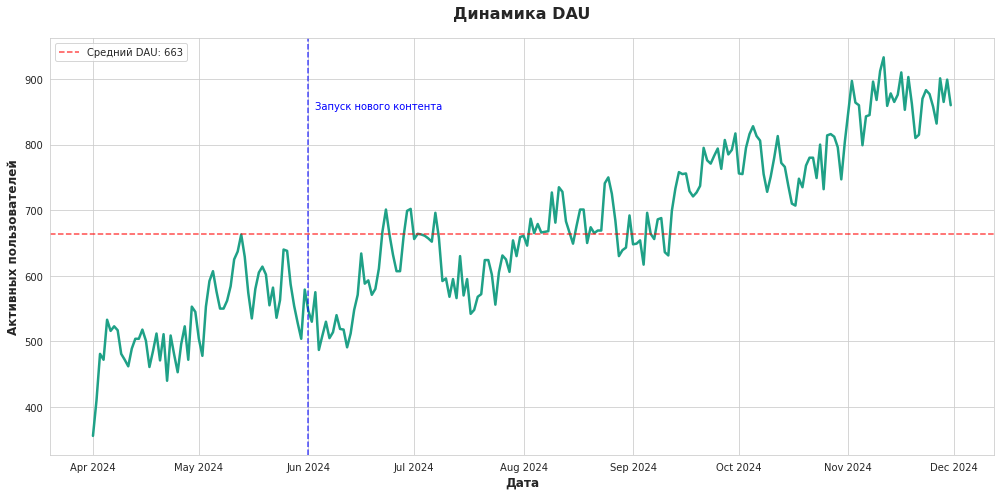

In [23]:
# извлекаем дату (без времени)
visits['date'] = visits['session_start'].dt.date

# Считаем DAU (уникальные пользователи в день)
dau_data = visits.groupby('date')['user_id'].nunique().reset_index()
dau_data.columns = ['date', 'DAU']
dau_data['date'] = pd.to_datetime(dau_data['date']) 
dau_data['month'] = dau_data['date'].dt.to_period('M')  # Добавляем месяц для цветовой кодировки

# Создаем график
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

fontdict = {'fontsize': 16, 'fontweight': 'bold'}

ax = sns.lineplot(data=dau_data, x='date', y='DAU',
                  color=palette[3], linewidth=2.5, legend=False)

ax.set_title('Динамика DAU', fontdict=fontdict, pad=20)
ax.set_xlabel('Дата', fontsize=12, fontweight='bold')
ax.set_ylabel('Активных пользователей', fontsize=12, fontweight='bold')

# Форматирование оси дат
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.tight_layout()

# Добавляем среднюю линию по всем данным
mean_dau = dau_data['DAU'].mean()
ax.axhline(mean_dau, color='red', linestyle='--', alpha=0.7, label=f'Средний DAU: {mean_dau:.0f}')

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.legend()
plt.show()

DAU в целом имеет быстро растущий тренд, в начале периода 200, в конце 900. волны с периодом 5-6 недель наблюдаются в летний период. При это заметна более короткая недельная цикличность. Общий рост DAU с середины июня может быть связан с запуском нового контента, но чтобы подтвердить пердположение требуется дальнейший анализ.

<div class="alert alert-info"> был не уверен начсет недельной цикличности. Теперь добавил замечание

<div class="alert alert-info"> поправил, добавил 

- **Динамика MAU**

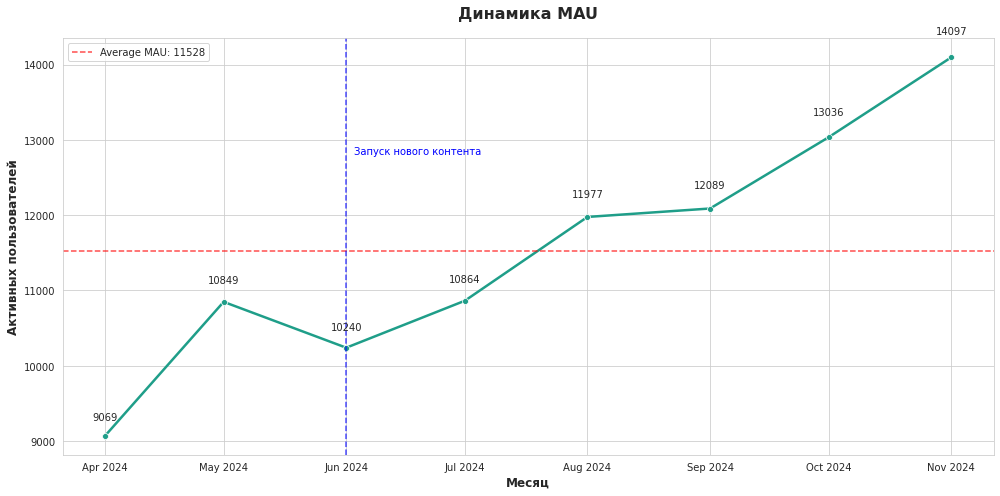

In [24]:
# Подготовка данных
visits['month'] = visits['session_start'].dt.to_period('M')
mau_data = visits.groupby('month')['user_id'].nunique().reset_index()
mau_data.columns = ['month', 'MAU']
mau_data['month'] = mau_data['month'].dt.to_timestamp()

# Стиль
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(mau_data))
fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# Линейный график
ax = sns.lineplot(data=mau_data, x='month', y='MAU', 
                 marker='o', linewidth=2.5, color=palette[4])

ax.set_title('Динамика MAU', fontdict, pad=20)
ax.set_xlabel('Месяц', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Активных пользователей', fontsize=12, fontweight = 'bold')

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Аннотации значений 
for x, y in zip(mau_data['month'], mau_data['MAU']):
    ax.text(x, y+0.02*y, f'{y}', ha='center', va='bottom', fontsize=10)

# Средняя линия
mean_mau = mau_data['MAU'].mean()
ax.axhline(mean_mau, color='red', linestyle='--', alpha=0.7, 
          label=f'Average MAU: {mean_mau:.0f}')
# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.legend()
plt.tight_layout()
plt.show()

MAU вырос с 9069 до 14097 за весь период. Апрель-Май ускоренный рост, единственное понижение показателя в июне (с 10849 в Мае до 10249 в июне). Нужно отметить падение MAU в месяц запуска нового контента, однако затем этот показатель растет.

In [25]:
# Приводим форматы даты в датасетах DAU и MAU к единому виду для корректного объединения
dau_data['month'] = dau_data['date'].dt.to_period('M').dt.to_timestamp()
mau_data['month'] = mau_data['month'].dt.to_period('M').dt.to_timestamp()

In [26]:
# Вычисляем среднемесячный дневной DAU
dau_monthly_average = dau_data.groupby('month')['DAU'].mean().reset_index(name = 'AVG_monthly_DAU')

# Объединяем AVG_monthly_DAU с соответствующим MAU
stickiness_data = pd.merge(dau_monthly_average, mau_data, how='left', on='month')

# Рассчитываем Stickiness Rate по месяцам
stickiness_data['Stickiness'] = stickiness_data['AVG_monthly_DAU'] / stickiness_data['MAU']*100

stickiness_data.head()

,month,AVG_monthly_DAU,MAU,Stickiness
0,2024-04-01,488.333333,9069,5.384644
1,2024-05-01,576.967742,10849,5.318165
2,2024-06-01,580.366667,10240,5.667643
3,2024-07-01,615.000000,10864,5.660898
4,2024-08-01,681.193548,11977,5.687514


- **Динамика Stickiness**

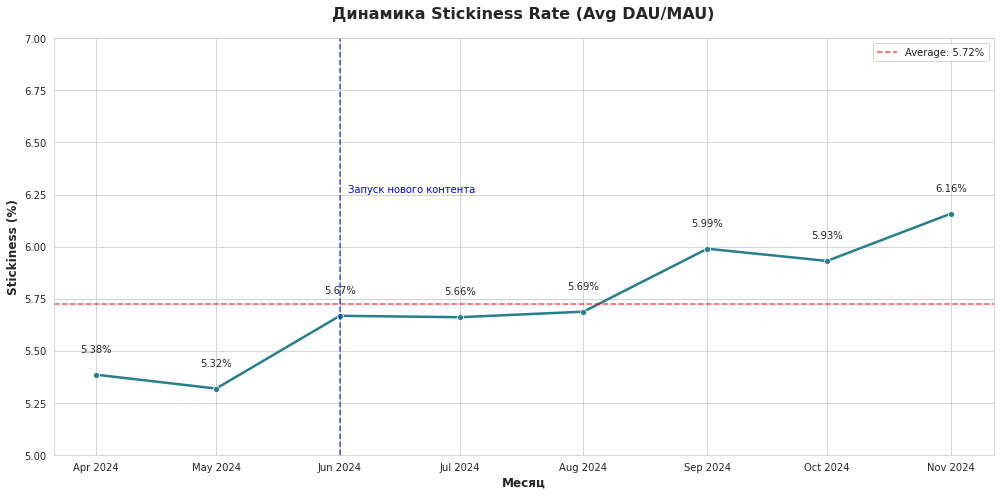

In [27]:
# Стиль 
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# Создаем график
ax = sns.lineplot(data=stickiness_data, 
                 x='month', 
                 y='Stickiness', 
                 marker='o',
                 linewidth=2.5,
                 color=palette[2])

ax.set_title('Динамика Stickiness Rate (Avg DAU/MAU)', fontdict = fontdict, pad=20 )
ax.set_xlabel('Месяц', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Stickiness (%)', fontsize=12, fontweight = 'bold')
ax.set_ylim(5, 7)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Добавляем подписи значений
for x, y in zip(stickiness_data['month'], stickiness_data['Stickiness']):
    ax.text(x, y+0.1, f'{y:.2f}%', 
           ha='center', 
           va='bottom', 
           fontsize=10)

# Средняя линия 
mean_stick = stickiness_data['Stickiness'].mean()
ax.axhline(mean_stick, 
           color='red', 
           linestyle='--', 
           alpha=0.7, 
           label=f'Average: {mean_stick:.2f}%')

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.legend()
plt.tight_layout()
plt.show()

Стагнация Stickiness в летние месяцы на уровне 5.67%. Но за весь период незначительно вырос с 5.38% до 6.16%

По этим трем метрикам можно отметить, что проект демонстрирует здоровый рост, а временное падение MAU в июне скорее всего было переходным периодом.

- **Средняя стоимость привлечения пользователя (CAC)**


In [28]:
# Вычисляем месячную среднюю стоимость привлечения пользователя по таблице profiles
profiles['first_month'] = pd.to_datetime(profiles['first_dt']).dt.to_period('M').dt.to_timestamp()
profiles['CAC_mean_monthly'] = profiles.groupby('first_month')['CAC'].transform('mean')

# Добавляем CAC_mean_monthly в датасет orders
orders['first_month'] = pd.to_datetime(orders['first_dt']).dt.to_period('M').dt.to_timestamp()
orders = pd.merge(profiles[['user_id','first_month', 'CAC_mean_monthly']], orders, on = ['first_month', 'user_id'] , how = 'right')

orders.head()


,user_id,first_month,CAC_mean_monthly,event_dt,revenue,first_dt,first_channel,CAC,lifetime
0,771951256319,2024-04-01,0.734706,2024-04-01 05:56:26,2.99,2024-04-01,FaceBoom,0.939390,0
1,829942381059,2024-04-01,0.734706,2024-04-01 14:55:02,2.99,2024-04-01,FaceBoom,0.939390,0
2,727879856738,2024-04-01,0.734706,2024-04-01 22:15:09,14.99,2024-04-01,FaceBoom,0.939390,0
3,481270888930,2024-04-01,0.734706,2024-04-01 06:05:14,2.99,2024-04-01,TipTop,0.742467,0
4,844695029762,2024-04-01,0.734706,2024-04-01 01:19:52,2.99,2024-04-01,FaceBoom,0.939390,0


- **Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения**


In [29]:
# Фильтруем датасет orders с учетом покупок, совершенных за первые 28 дней (включительно)
orders_days_28 = orders[orders['lifetime'] < 28]

# Агрегируем данные
LTV = orders_days_28.groupby('first_month').agg(
    revenue_monthly =('revenue', 'sum'),
    CAC = ('CAC_mean_monthly', 'mean' )).reset_index()
    
# Считаем число активных пользователей, совершавших визиты в приложение  
visits['first_month'] = pd.to_datetime(visits['first_dt']).dt.to_period('M').dt.to_timestamp()
visits_group = visits.groupby('first_month')['user_id'].nunique().reset_index(name='users_monthly')

# Добавляем активных пользователей к данным 
LTV = LTV.merge(visits_group, on = 'first_month', how = 'left')

# Рассчитываем LTV
LTV['LTV'] = LTV['revenue_monthly']/LTV['users_monthly']

# Рассчитываем ROI
LTV['ROI'] = (LTV['LTV'] - LTV['CAC'])/LTV['CAC']*100


LTV.head()

,first_month,revenue_monthly,CAC,users_monthly,LTV,ROI
0,2024-04-01,7425.63,0.734706,9069,0.818793,11.444870
1,2024-05-01,8141.76,0.748572,9789,0.831725,11.108209
2,2024-06-01,7447.84,0.973978,8719,0.854208,-12.297015
3,2024-07-01,9991.41,1.054344,8742,1.142920,8.401051
4,2024-08-01,10367.05,1.155601,9518,1.089205,-5.745639


** ***В дальнейшем, чтобы избежать падения метрик анализе в периоде следующих 28 дней, представим данные до конца октября, полнота которых обеспечится данными следующего месяца***

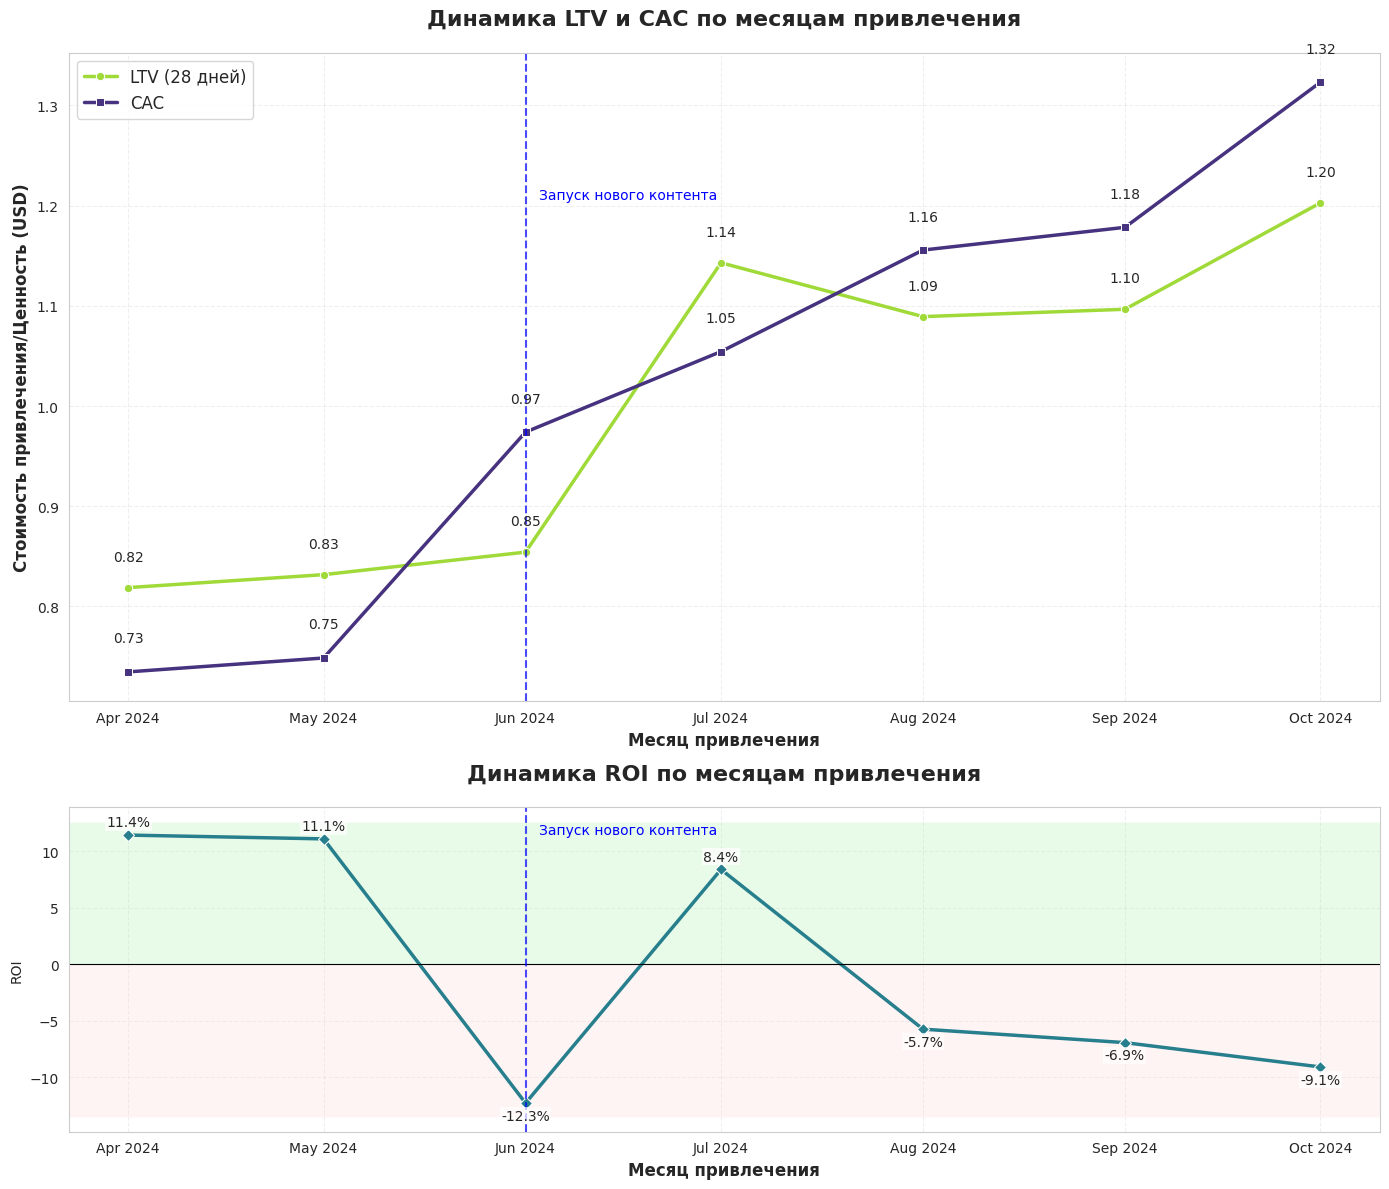

In [30]:
# Настройка стиля
plt.style.use('default')
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# Создаем subplot с двумя графиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})


# Преобразуем first_month в datetime для правильного форматирования
LTV['month_dt'] = pd.to_datetime(LTV['first_month'].astype(str))

# Ограничиваем данные
LTV = LTV[LTV['month_dt'] < '2024-11-01']

# График 1: LTV и CAC по месяцам (без изменений)
sns.lineplot(data=LTV, x='month_dt', y='LTV', marker='o', 
            color=palette[5], label='LTV (28 дней)', ax=ax1, linewidth=2.5)
sns.lineplot(data=LTV, x='month_dt', y='CAC', marker='s', 
            color=palette[0], label='CAC', ax=ax1, linewidth=2.5)

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax1.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax1.text(june_2024 + pd.Timedelta(days=2), 
        ax1.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

ax1.set_title('Динамика LTV и CAC по месяцам привлечения', fontdict=fontdict, pad=20)
ax1.set_xlabel('Месяц привлечения', fontsize=12, fontweight='bold')
ax1.set_ylabel('Стоимость привлечения/Ценность (USD)', fontsize=12, fontweight='bold')
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%b %Y'))
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# Добавляем подписи значений
for x, y in zip(LTV['month_dt'], LTV['LTV']):
    ax1.text(x, y+0.02*max(LTV['LTV']), f'{y:.2f}', ha='center', va='bottom', fontsize=10)

for x, y in zip(LTV['month_dt'], LTV['CAC']):
    ax1.text(x, y+0.02*max(LTV['CAC']), f'{y:.2f}', ha='center', va='bottom', fontsize=10)

# График 2: ROI по месяцам
sns.lineplot(data=LTV, x='month_dt', y='ROI', marker='D', 
            color=palette[2], ax=ax2, linewidth=2.5)
# заливка всего поля
ax2.axhspan(0, max(LTV['ROI'])*1.1, facecolor='#90EE90', alpha=0.2) 
ax2.axhspan(min(LTV['ROI'])*1.1, 0, facecolor='#FFCCCB', alpha=0.2)  

ax2.set_title('Динамика ROI по месяцам привлечения', fontdict=fontdict, pad=20)
ax2.set_xlabel('Месяц привлечения', fontsize=12, fontweight='bold')
ax2.xaxis.set_major_locator(MonthLocator())
ax2.xaxis.set_major_formatter(DateFormatter('%b %Y'))
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)

# Добавляем подписи значений
for x, y in zip(LTV['month_dt'], LTV['ROI']):
    va = 'bottom' if y >= 0 else 'top'
    offset = 0.5 if y >= 0 else -0.5
    ax2.text(x, y + offset, f'{y:.1f}%', 
            ha='center', va=va, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax2.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax2.text(june_2024 + pd.Timedelta(days=2), 
        ax2.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.tight_layout()
plt.show()

CAC с каждым месяцем увеличивается и в целом вырос с 0.72 в апреле до 1.32 в ноябре.
LTV только в аперле, мае и июле превысил CAC что соответствует положительным ROI (+11.4% апрель, +11.1% май, +8.4% июль). В другие месяцы инвестиции не возвращаются, наиболее убыточные месяцы - июнь - 12.3% и октябрь - 9.1%.
После запуска нового контента значения LTV и  ROI начали "скакать": в июне упали ниже CAC, в июле поднялись выше, затем снова опустились ниже порога окупаемости.

<div class="alert alert-info"> поменял на линейный график. Да, так нагляднее динамика роста и падения

### 📊 **Промежуточные выводы**  

1. **⚡ Реакция на запуск контента:**  
   - 📉 Временное **падение MAU** на 5.5% в июне (10 849 → 10 249) с последующим восстановлением  
   - 📈 **Рост DAU в 4.5x** (200 → 900) - маркетинг успешно **успешно масштабирует** привлечение пользователей  
   - ⏸️ Стагнация Stickiness на фоне нового контента на уровне ~6%  
   - ❓ **Контент не повысил частоту использования**  


2. **💰 Динамика монетизации:**  
   - 💸 **Рост CAC** связан с активным продвижением нового контента   
   - ⚠️ Требуется оптимизация **качества трафика** и удержания  


4. **🔥 Критичные проблемы монетизации:**  
   - 💸 **CAC растёт быстрее LTV** (CAC ↗ на 83% vs LTV с отрицательной динамикой в 5 из 8 месяцев)  
   - 🚫 **ROI неизбежно падает** - худшие показатели: июнь (-12.3%) и октябрь (-9.1%) 
   
   🚨 Главный вывод:

   
Проект успешно наращивает аудиторию (DAU/MAU), но теряет экономическую эффективность. Запуск контента вызвал позитивные эффекты (рост DAU), но не решил проблемы монетизации. Требуется срочная оптимизация CAC и повышение LTV через улучшение удержания и конверсии.
---
> 🚨 **Рекомендация для дальнейших действий:**  
> 🔄 Анализ retention по когортам (особенно июньских пользователей)  
> 📊 Аудит маркетинговых каналов с отрицательным ROI

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определим самые популярные источники привлечения:
- Посчитаем общее число привлечённых пользователей для каждого источника.
- Визуализируем динамику набора новых пользователей по дням в каждом источнике.
- Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучим динамику изменения метрик на 28-й день в разрезе источника. Проведем анализ с выделением недельных когорт по дате привлечения. Рассчитаем и визуализируем:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведем анализ рекламных каналов. Дадим общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажем, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположим почему.


- **Посчитаем общее число привлечённых пользователей для каждого источника**


In [31]:
users_per_channel = visits.groupby('first_channel')['user_id'].nunique().reset_index(name = 'users_count')
users_per_channel

,first_channel,users_count
0,FaceBoom,28401
1,MediaTornado,14080
2,RocketSuperAds,14257
3,TipTop,18118


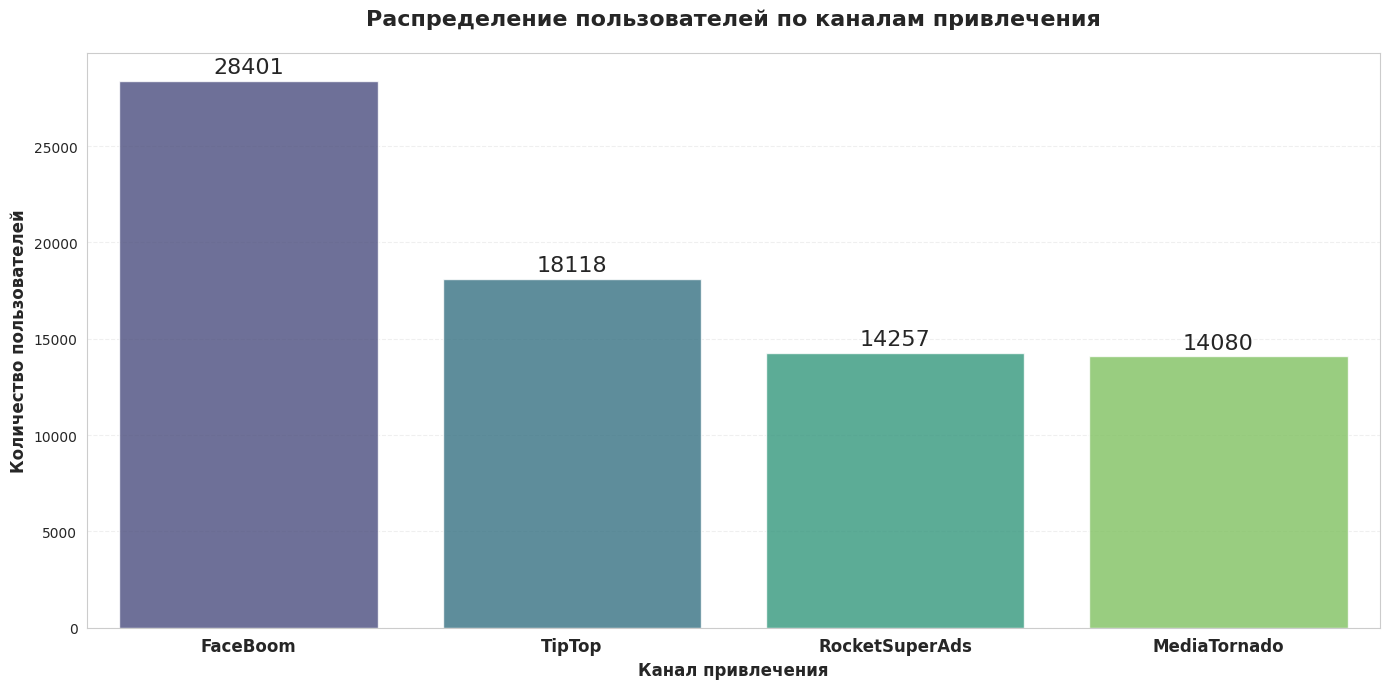

In [32]:
# Настройка стиля 
plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
palette = sns.color_palette("viridis", len(users_per_channel))

# Сортируем каналы по количеству пользователей 
users_per_channel = users_per_channel.sort_values('users_count', ascending=False)

# Визуализация
ax = sns.barplot(
    data=users_per_channel,
    x='first_channel',
    y='users_count',
    palette=palette,
    alpha=0.8
)
ax.set_title('Распределение пользователей по каналам привлечения', fontsize=16, fontweight='bold',  pad=20)
ax.set_xlabel('Канал привлечения', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Количество пользователей', fontsize=12, fontweight = 'bold')
plt.xticks( 
    ha='center',  
    fontsize=12,  
    fontweight='bold'
)
# Добавляем подписи значений 
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=16
    )

ax.yaxis.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

FaceBoom и TipTop - лидируют по числу привлеченных пользователей (28401 и 18118 соответственно). RocketSuperAds и MediaTornado приблизительно равны по числу привлеченных (14257и 14080 соответственно)

- **Визуализируем динамику набора новых пользователей по дням в каждом источнике**


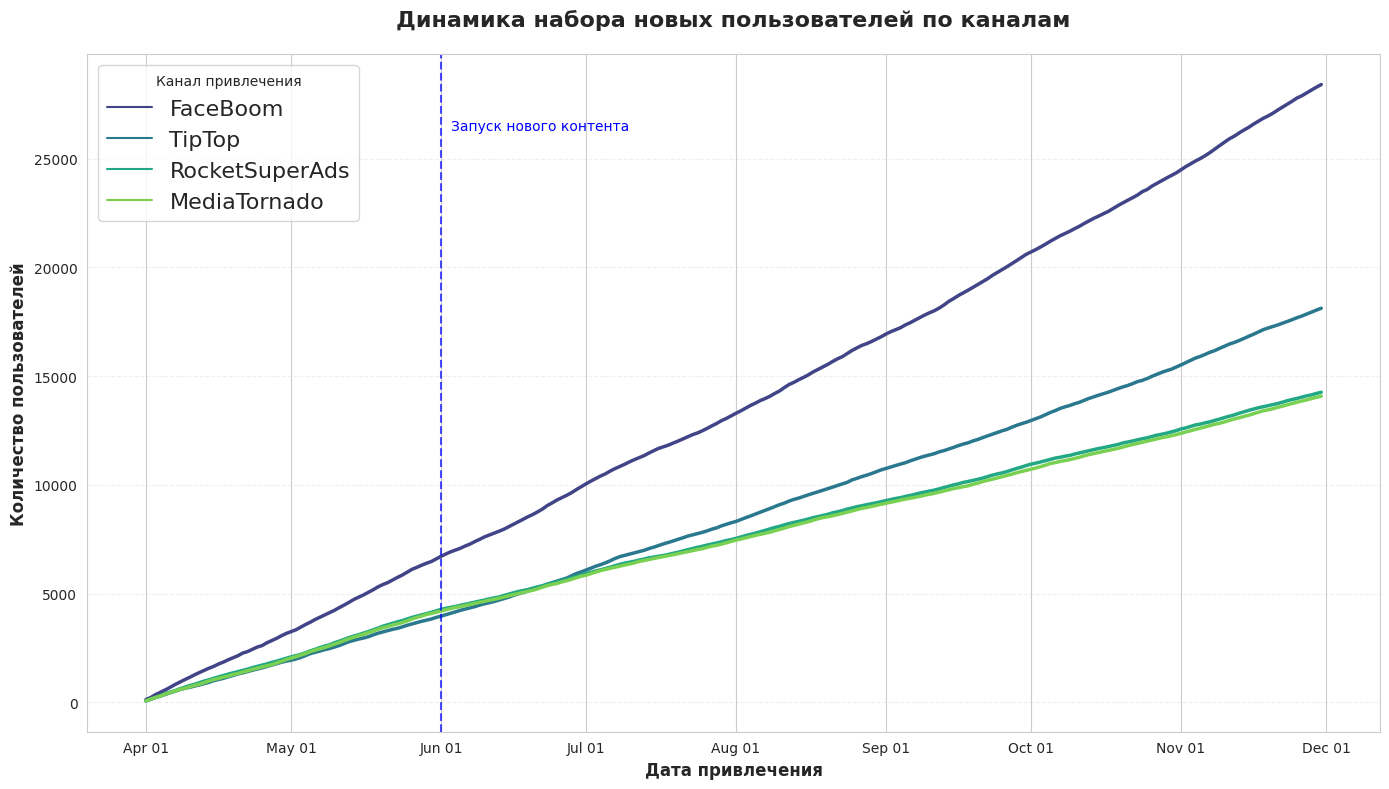

In [33]:
users_per_channel_dynamic = visits.groupby(['first_channel', 'first_dt'])['user_id'].nunique().reset_index(name = 'users_count')
users_per_channel_dynamic['users_cumsum'] = users_per_channel_dynamic.groupby('first_channel')['users_count'].cumsum()

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
users_per_channel_dynamic['first_channel'] = pd.Categorical(
    users_per_channel_dynamic['first_channel'],
    categories=custom_order,
    ordered=True
)
users_per_channel_dynamic = users_per_channel_dynamic.sort_values('first_channel')

# Настройка стиля
plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
palette = sns.color_palette("viridis", len(users_per_channel_dynamic['first_channel'].unique()))

# Визуализация
ax = sns.lineplot(
    data=users_per_channel_dynamic,
    x='first_dt',
    y='users_cumsum',
    hue='first_channel',
    palette=palette,
    linewidth=2.5
)
ax.set_title('Динамика набора новых пользователей по каналам', fontsize=16, fontweight = 'bold', pad=20)
ax.set_xlabel('Дата привлечения', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Количество пользователей', fontsize=12, fontweight = 'bold')
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Канал привлечения', loc='upper left', fontsize=16)

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.tight_layout()
plt.show()

Динамика набора новых пользователей линейна по всем каналам. К концу периода лидер FaceBoom привлек ~28000, TipTop ~17000, RocketSuperAds и MediaTornado ~14000 новых пользователей

- **Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения**


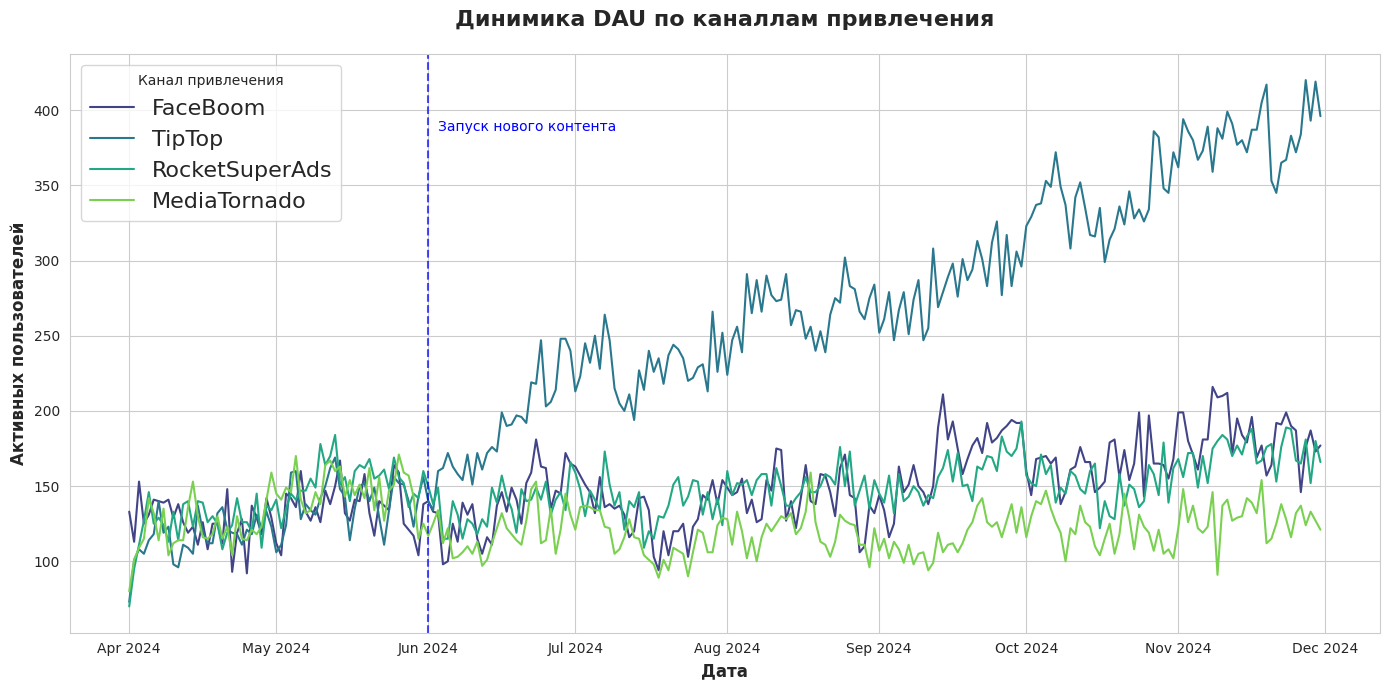

In [34]:
# извлекаем дату (без времени)
visits['date'] = visits['session_start'].dt.date

# Считаем DAU (уникальные пользователи в день)
dau_per_channel = visits.groupby(['date', 'first_channel'])['user_id'].nunique().reset_index(name = 'DAU')
dau_per_channel = dau_per_channel.sort_values('DAU', ascending=False)


dau_per_channel['date'] = pd.to_datetime(dau_per_channel['date'])  # Преобразуем в datetime
dau_per_channel['month'] = dau_per_channel['date'].dt.to_period('M')  # Добавляем месяц для цветовой кодировки

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
dau_per_channel['first_channel'] = pd.Categorical(
    dau_per_channel['first_channel'],
    categories=custom_order,
    ordered=True
)
dau_per_channel = dau_per_channel.sort_values('first_channel')

# Создаем график
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# Линейный график
ax = sns.lineplot(data=dau_per_channel, x='date', y='DAU', hue='first_channel',
                 palette='viridis', linewidth=1.5)

ax.set_title('Динимика DAU по каналлам привлечения', fontdict = fontdict, pad=20)
ax.set_xlabel('Дата', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Активных пользователей', fontsize=12, fontweight = 'bold')

# Форматирование оси дат
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks()
plt.tight_layout()

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.legend(title='Канал привлечения', loc='upper left', fontsize=16)
plt.show()

DAU по TipTop с запуском нового контента растет(~100 в июне до ~400 в ноябре). Дневная активность пользователей, привлеченных по другим каналам в целом находится в диапазоне 100 - 200, и к концу периода ближе к верхнему пределу(170-180) кроме канала MediaTornado, DAU которого так и не вырос к ноябрю (около 120)

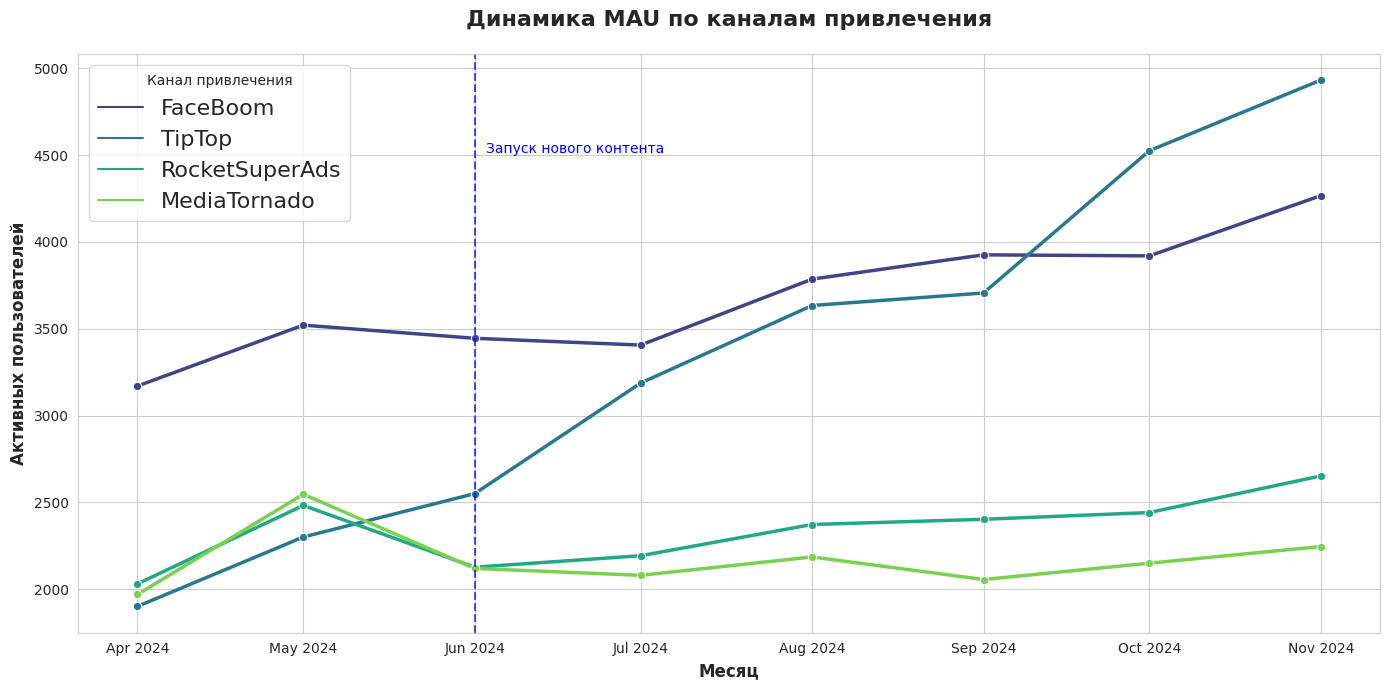

In [35]:
# Рассчитываем MAU (уникальные пользователи в месяц по каналам)
mau_per_channel = visits.groupby(['month', 'first_channel'])['user_id'].nunique().reset_index(name='MAU')
mau_per_channel = mau_per_channel.sort_values('MAU', ascending=False)
mau_per_channel['month'] = mau_per_channel['month'].dt.to_timestamp()

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
mau_per_channel['first_channel'] = pd.Categorical(
    mau_per_channel['first_channel'],
    categories=custom_order,
    ordered=True
)
mau_per_channel = mau_per_channel.sort_values('first_channel')

# Создаем график
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# Линейный график с цветовой кодировкой по каналам
ax = sns.lineplot(data=mau_per_channel, x='month', y='MAU', hue='first_channel', marker = 'o',
                 palette='viridis', linewidth=2.5)

ax.set_title('Динамика MAU по каналам привлечения', fontdict=fontdict, pad=20)
ax.set_xlabel('Месяц', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Активных пользователей', fontsize=12, fontweight = 'bold')

# Форматирование оси дат
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks()
plt.tight_layout()

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.legend(title='Канал привлечения', loc='upper left', fontsize=16)
plt.show()

​Месячная активность MAU наиболее существенно выросла для TipTop c ~ 1800 в апреле до ~ 4900 в ноябре, запуск нового контента в июне ускорил рост. MAU FaceBoom лидер в начале периода ~ 3200 в апреле, к концу уступает каналу TipTop (~ 4200 для FaceBoom в ноябре). Месячная активность RocketSuperAds и MediaTornado в стартует с уверенным ростом начале периода (с ~ 2000 в апреле до ~ 2500 в мае), однако в июне, с запуском нового контента, падает до 2100 и в дальнейшем на всем периоде стагнирует или растет незначительно


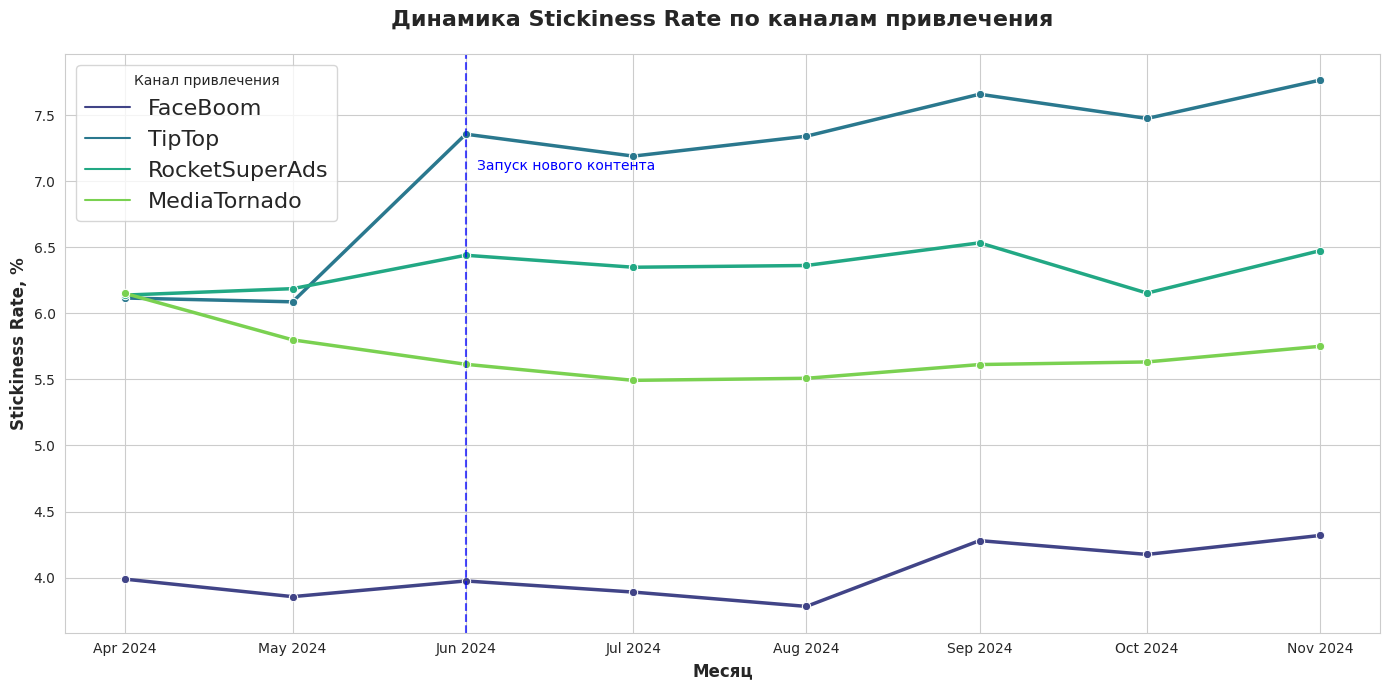

In [36]:
# Рассчитываем среднемесячный DAU
dau_per_channel_mean = dau_per_channel.groupby(['month', 'first_channel'])['DAU'].mean().reset_index(name = 'DAU_monthly_mean')
mau_per_channel['month'] = mau_per_channel['month'].dt.to_period('M')

# Объединяем DAU_monthly_mean с таблицей mau_per_channel
stick_per_channel = mau_per_channel.merge(dau_per_channel_mean, on = ['month', 'first_channel'], how = 'left')
stick_per_channel['month'] = stick_per_channel['month'].dt.to_timestamp()

# Вычисляем Stickiness rate
stick_per_channel['stickiness'] = stick_per_channel['DAU_monthly_mean']/stick_per_channel['MAU']*100

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
stick_per_channel['first_channel'] = pd.Categorical(
    stick_per_channel['first_channel'],
    categories=custom_order,
    ordered=True
)
mau_per_channel = mau_per_channel.sort_values('first_channel')

# Создаем график
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# Линейный график с цветовой кодировкой по каналам
ax = sns.lineplot(data=stick_per_channel, x='month', y='stickiness', hue='first_channel', marker = 'o',
                 palette='viridis', linewidth=2.5)

ax.set_title('Динамика Stickiness Rate по каналам привлечения', fontdict=fontdict, pad=20)
ax.set_xlabel('Месяц', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Stickiness Rate, %', fontsize=12, fontweight = 'bold')

# Форматирование оси дат
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks()
plt.tight_layout()

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.legend(title='Канал привлечения', loc='upper left', fontsize=16)
plt.show()

Прилипание Stickiness 6.1% для TipTop, MediaTornado и RocketSuperAds в аперле. В июне, с запуском нового контента, наблюдается скачок для TipTop до 7.3%. На всем летнем периоде Stickiness по всем каналам стагнирует, затем в сентябре испытывает небольшой рост. FaceBoom показывает самые низкие значения в диапазоне 4-4.3% на всем периоде.

- **Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день)**


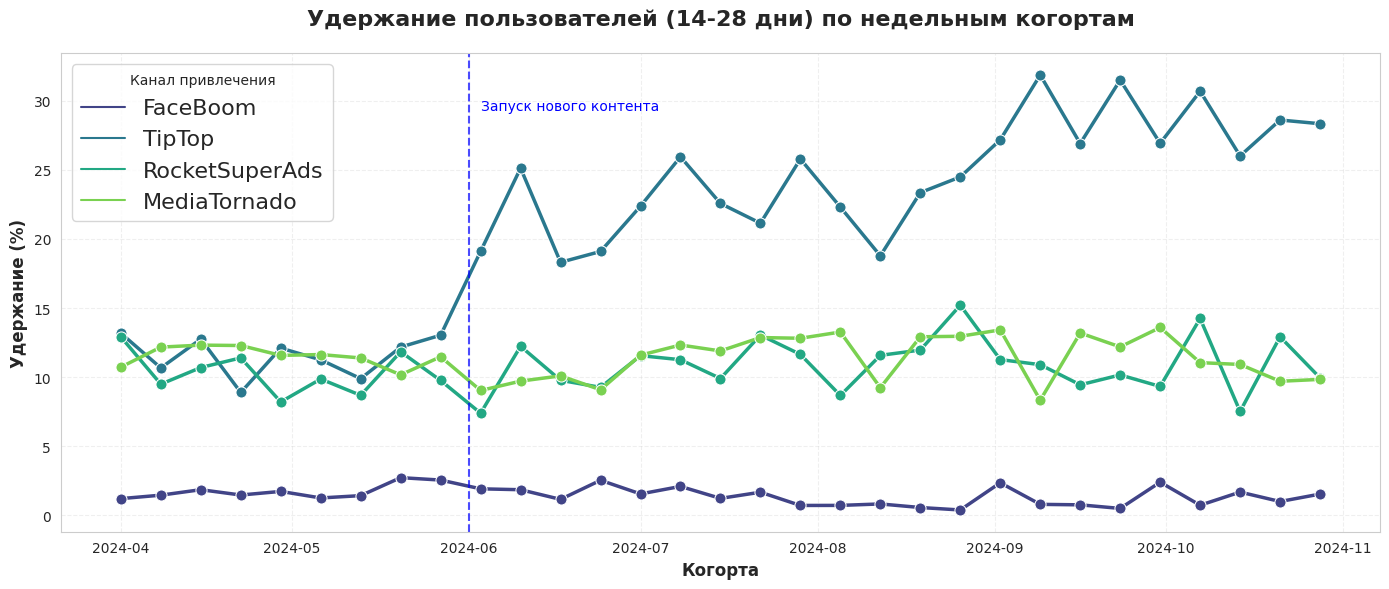

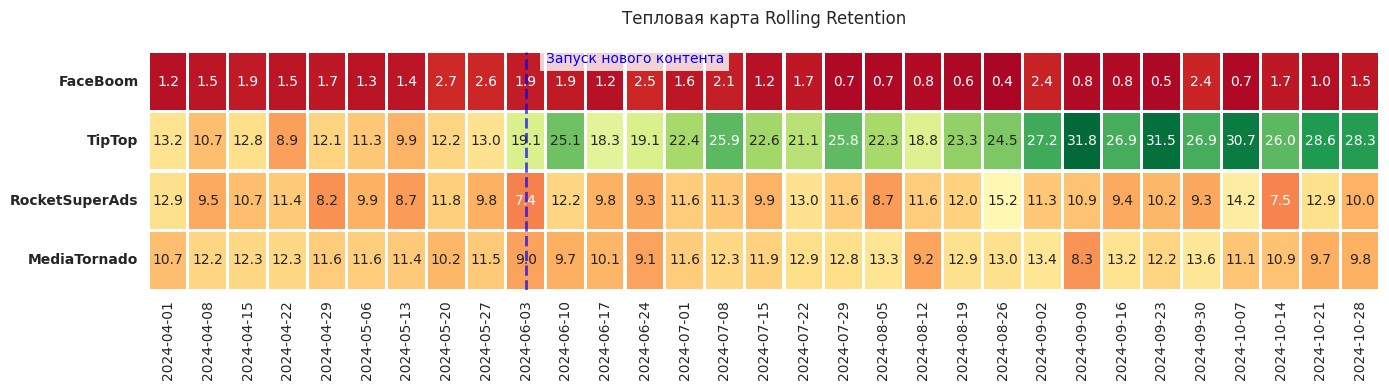

In [37]:
# Создадим поле времени жизни пользователей по посещениям
visits['lifetime_visits'] = (visits['session_start'] - visits['first_dt']).dt.days
# Фильтруем данные по первым 28 дням
days_28 = visits[visits['lifetime_visits'] < 28].copy()

# 2. Формируем недельные когорты (начало недели в формате YYYY-MM-DD)
days_28['cohort_week'] = days_28['first_dt'].dt.to_period('W').dt.start_time
#days_28['cohort_week_str'] = days_28['cohort_week'].dt.strftime('%Y-%m-%d')

# Отфильтруем последние когорты ноября для корректности и полноты данных в когортах 
days_28 = days_28[days_28['cohort_week'] < '2024-10-29']

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
days_28['first_channel'] = pd.Categorical(
    days_28['first_channel'],
    categories=custom_order,
    ordered=True
)
days_28 = days_28.sort_values('first_channel')

# 3. Расчет удержания (14-28 дни)
def calculate_retention(group):
    # Пользователи, которые были активны в день привлечения (lifetime_visits=0)
    total_users = group[group['lifetime_visits'] == 0]['user_id'].nunique()
    
    if total_users == 0:
        return 0.0  # Защита от деления на ноль
    
    # Пользователи, активные в период 14-28 дней
    active_users = group[
        (group['lifetime'] >= 13) & 
        (group['lifetime'] <= 27)
    ]['user_id'].nunique()
    
    return active_users / total_users * 100

retention_df = days_28.groupby(['cohort_week', 'first_channel']).apply(calculate_retention).reset_index()
retention_df.columns = ['cohort_week', 'channel', 'retention']

# 4. Визуализация
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Сортируем когорты по дате
retention_df['cohort_date'] = pd.to_datetime(retention_df['cohort_week'])
retention_df = retention_df.sort_values('cohort_date')

# Создаем график
ax = sns.lineplot(
    data=retention_df,
    x='cohort_week',
    y='retention',
    hue='channel',
    palette='viridis',
    linewidth=2.5,
    marker='o',
    markersize=8
)

plt.title('Удержание пользователей (14-28 дни) по недельным когортам', fontweight = 'bold', fontsize=16, pad=20)
plt.xlabel('Когорта', fontsize=12, fontweight = 'bold')
plt.ylabel('Удержание (%)', fontsize=12, fontweight = 'bold')
plt.xticks(ha='center')
plt.legend(title='Канал привлечения', loc='upper left', fontsize=16)

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
# Подготовка данных для тепловой карты
retention_df['cohort_week_str'] = retention_df['cohort_week'].dt.strftime('%Y-%m-%d')
heatmap_retention = retention_df.pivot(index='channel', 
                                     columns='cohort_week_str', 
                                     values='retention')

# Находим позицию для линии (1 июня 2024)
launch_date = '2024-06-01'
columns = heatmap_retention.columns
if launch_date in columns:
    launch_pos = list(columns).index(launch_date) + 0.5 
else:
    launch_pos = np.searchsorted(columns, launch_date) + 0.5

# Настройка стиля 
plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 4))

# Создаем тепловую карту
ax = sns.heatmap(
    heatmap_retention,
    annot=True,
    fmt=".1f", 
    cmap="RdYlGn",
    linewidths=1.5,
    cbar=False,
    annot_kws={"size": 10},
    vmin=0,   
    vmax=32   
)

# Добавляем вертикальную линию запуска контента
ax.axvline(x=launch_pos, color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Добавляем аннотацию
ax.text(launch_pos + 0.5, 0, 'Запуск нового контента',
       ha='left', va='top', color='blue', fontsize=10,
       bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax.set_title('Тепловая карта Rolling Retention', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(fontsize=10, ha='center')
plt.yticks(rotation=0, ha='right', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

FaceBoom не удерживает пользователей, RR не более 2% по всем привлеченным когортам. RR других каналов на уровне 10-15% с апреля по июнь. Когорты, привлеченные через TipTop, начиная с первой недели июня - с запуском нового контента, показывают рост удержания с 13% в мае до 25% для второй когорты июня, а затем когорты осени до 35%. RocketSuperAds и MediaTornado демонстрируют стабильное удержание на всем периоде с апреля по ноябрь на уровне 10-15%.

- **Конверсия в покупку**


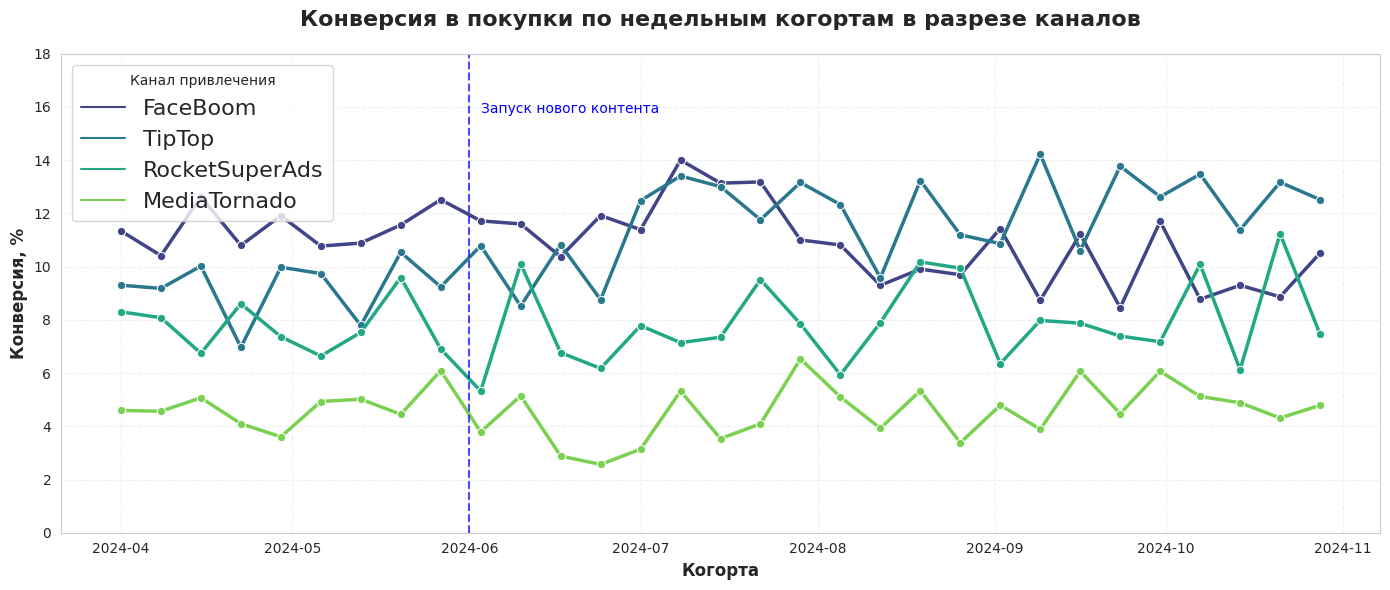

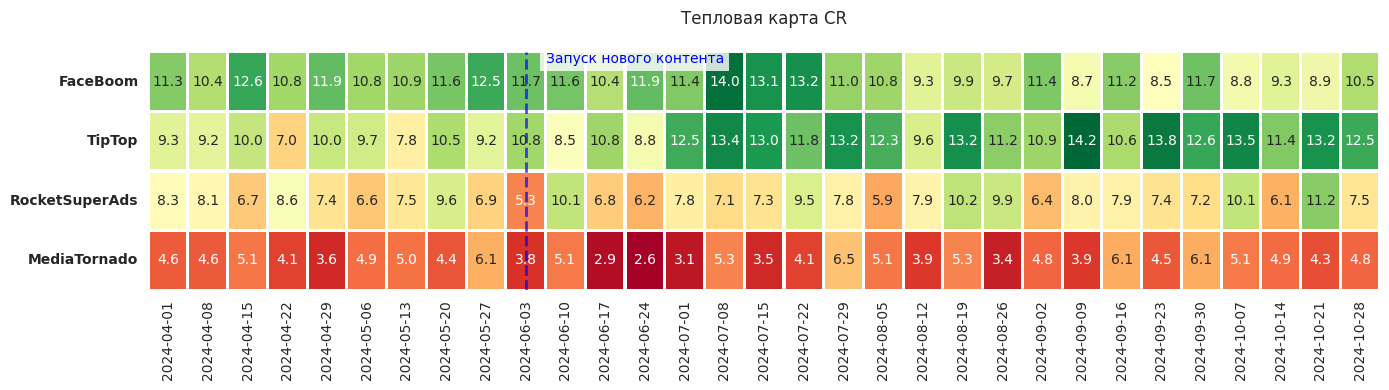

In [38]:
# Присоединим к таблице days_28 с недельными когортами информацию о покупках, совершенных в первые 28 дней
days_28_orders = days_28.merge(
    orders[orders['lifetime'] < 28]
    [['user_id', 'first_channel', 'first_dt', 'event_dt']],
    on = ['user_id', 'first_channel', 'first_dt'], how = 'left')

# Группируем по когортам и каналам с подсчетом числа привлеченных
days_28_users = days_28_orders.groupby(
    ['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='users')

# Группируем по когортам и каналам с подсчетом совершивших покупку пользователей
days_28_buyers = days_28_orders[
    days_28_orders['event_dt'].notna()].groupby(
    ['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='buyers')

# Соединяем таблицы days_28_users и days_28_buyers
days_28_cr = pd.merge(days_28_users, days_28_buyers, on=['cohort_week', 'first_channel'], how='left')

# Рассчитываем конверсию
days_28_cr['conversion'] = days_28_cr['buyers']/days_28_cr['users']*100

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
days_28_cr['first_channel'] = pd.Categorical(
    days_28_cr['first_channel'],
    categories=custom_order,
    ordered=True
)
days_28 = days_28.sort_values('first_channel')

# Настройка стиля
plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Создаем график
ax = sns.lineplot(
    data=days_28_cr,
    x='cohort_week',
    y='conversion',
    hue='first_channel',
    palette='viridis',
    linewidth=2.5,
    marker='o'
)

ax.set_title('Конверсия в покупки по недельным когортам в разрезе каналов', fontsize=16, pad=20, fontweight = 'bold')
ax.set_xlabel('Когорта', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Конверсия, %', fontsize=12, fontweight = 'bold')
ax.set_ylim(0, 18) 
plt.xticks(ha='center', fontsize=10)
plt.legend(title='Канал привлечения', loc='upper left', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.tight_layout()
plt.show()

# Преобразуем данные в формат для тепловой карты
days_28_cr['cohort_week_str'] = days_28_cr['cohort_week'].dt.strftime('%Y-%m-%d')
heatmap_data = days_28_cr.pivot(index='first_channel', 
                              columns='cohort_week_str', 
                              values='conversion')

# Находим позицию для линии (1 июня 2024)
launch_date = '2024-06-01'
columns = heatmap_data.columns
if launch_date in columns:
    launch_pos = list(columns).index(launch_date) + 0.5  # +0.5 для центрирования между столбцами
else:
    # Если точной даты нет, находим ближайшую
    launch_pos = np.searchsorted(columns, launch_date) + 0.5

# Настройка стиля
plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 4))

# Создаем тепловую карту
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="RdYlGn",
    linewidths=1.5,
    cbar=False,
    annot_kws={"size": 10}
)

# Добавляем вертикальную линию запуска контента
ax.axvline(x=launch_pos, color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Добавляем аннотацию
ax.text(launch_pos + 0.5, 0, 'Запуск нового контента',
       ha='left', va='top', color='blue', fontsize=10,
       bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax.set_title('Тепловая карта CR', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(fontsize=10, ha='center')
plt.yticks(rotation=0, ha='right', va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

Конверсия в покупки для пользователей привлеченных по всем каналам не имеет ярко выраженных трендов. Небольшой рост конверсии с начала лета до конца периода наблюдается у TipTop с 10 до 14%. MediaTornado имеет самую низкую конверсию колеблется около 4% на всем периоде. RocketSuperAds сохраняет стабильность около 8%. У FaceBoom самая высокая конверсия в начале периода 11%, к концу 9%. Канал демонстрирует хороший потенциал, **повышение Retention для FaceBoom - ключ к росту!**

<div class="alert alert-info"> Действительно очень хорошее замечание. Добавил, спасибо.

- **Недельная динамика затрат на маркетинг по каждому источнику привлечения**

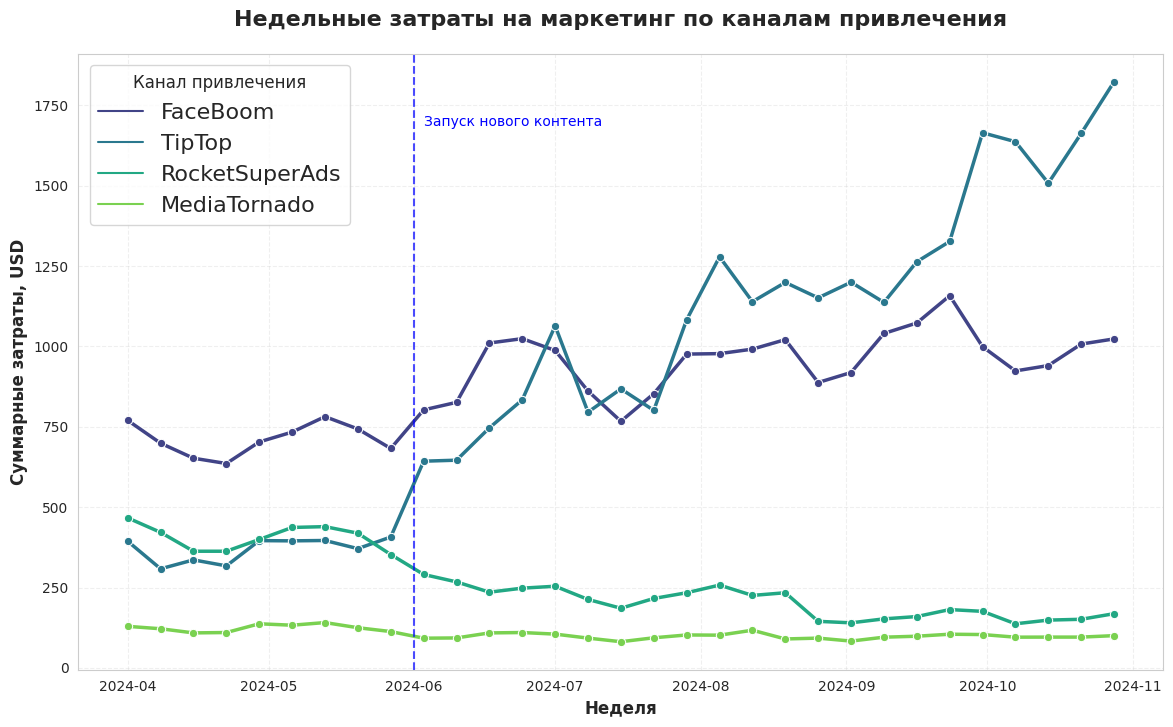

In [39]:
# Создаем столбец недельной гранулярности 
profiles['cohort_week'] = pd.to_datetime(profiles['first_dt']).dt.to_period('W').dt.start_time

# Отфильтруем последние когорты ноября для корректности и полноты данных
profiles = profiles[profiles['cohort_week'] < '2024-10-29']

# Считаем затраты и пользователей по неделям и каналам
profiles_cohorts_weekly = profiles.groupby(['cohort_week', 'first_channel']).agg(
    cost_weekly_sum = ('CAC', 'sum' ),
    users_weekly = ('user_id', 'nunique')).reset_index()

# Отфильтруем последние когорты ноября для корректности и полноты данных в когортах 
profiles_cohorts_weekly = profiles_cohorts_weekly[profiles_cohorts_weekly['cohort_week'] < '2024-11-05']

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
profiles_cohorts_weekly['first_channel'] = pd.Categorical(
    profiles_cohorts_weekly['first_channel'],
    categories=custom_order,
    ordered=True
)
profiles_cohorts_weekly = profiles_cohorts_weekly.sort_values('first_channel')
# Настройки стиля
plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
# Создаем график
ax = sns.lineplot(
    data=profiles_cohorts_weekly,
    x='cohort_week',
    y='cost_weekly_sum',
    hue='first_channel',
    palette='viridis',
    linewidth=2.5,
    marker='o'
)
ax.set_title('Недельные затраты на маркетинг по каналам привлечения', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Неделя', fontsize=12, fontweight='bold')
ax.set_ylabel('Суммарные затраты, USD', fontsize=12, fontweight='bold')
plt.xticks( fontsize=10)
plt.legend(title='Канал привлечения', loc='upper left', fontsize=16, title_fontsize=12)

# Добавляем вертикальную линию на июнь 2024
june_2024 = pd.to_datetime('2024-06-01')
ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

# Добавляем аннотацию к вертикальной линии
ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

- **Динамика среднего CAC, значений LTV и ROI**

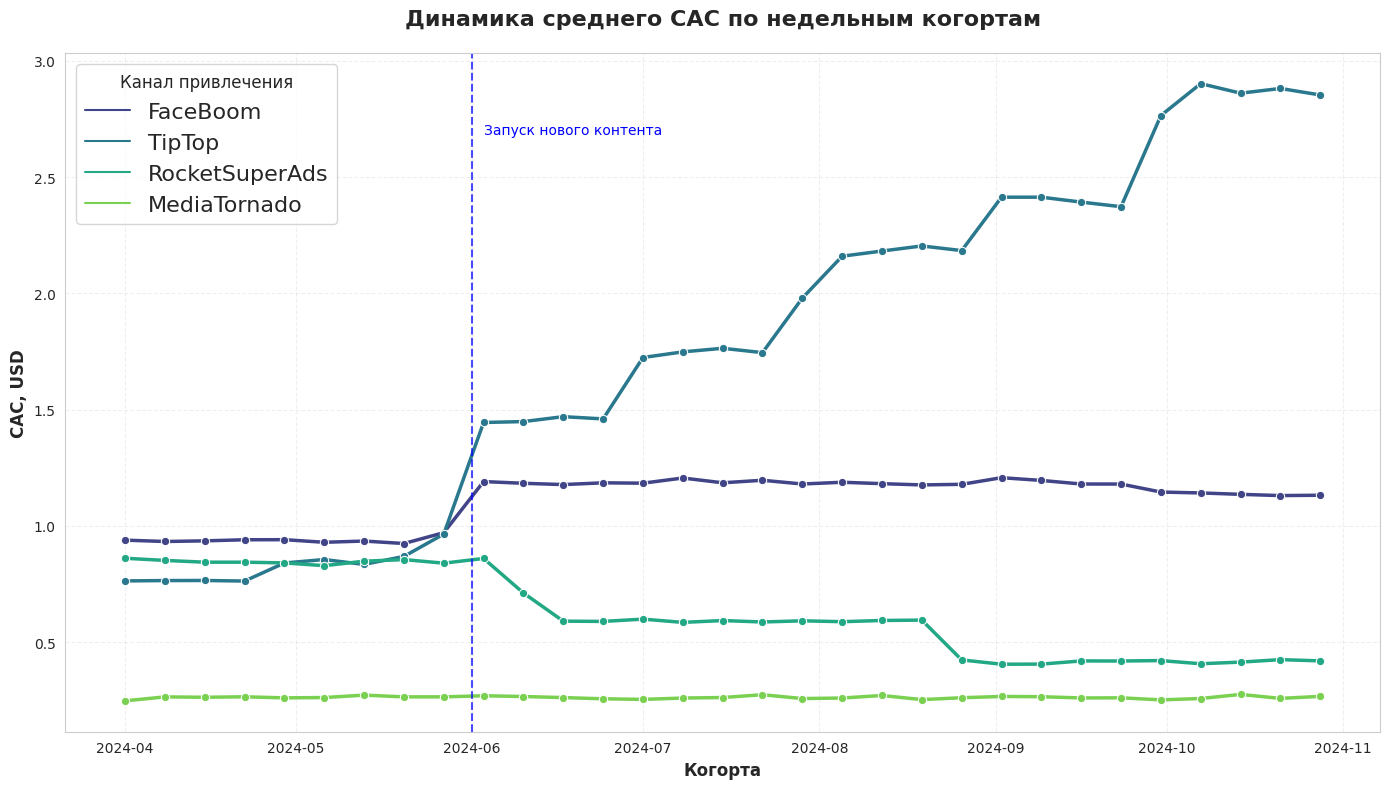

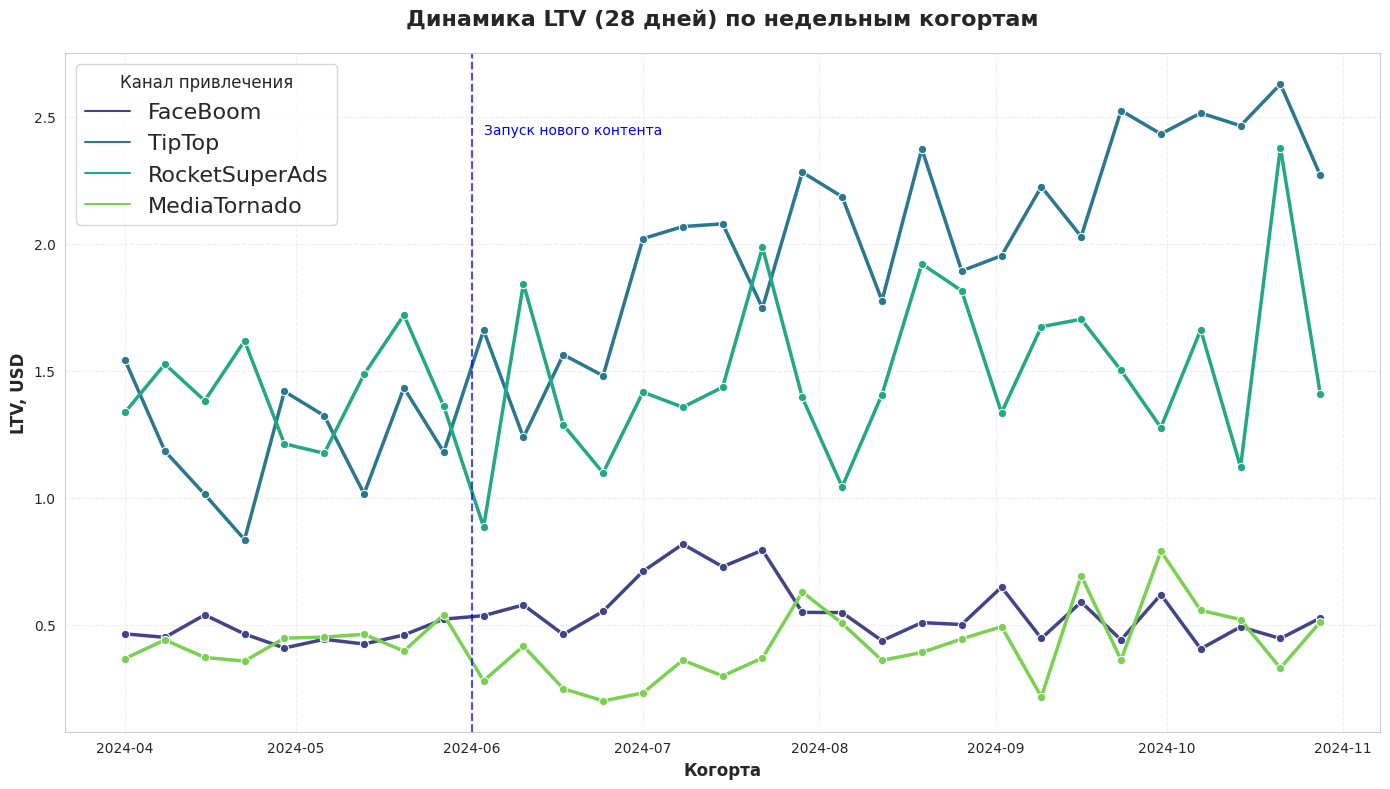

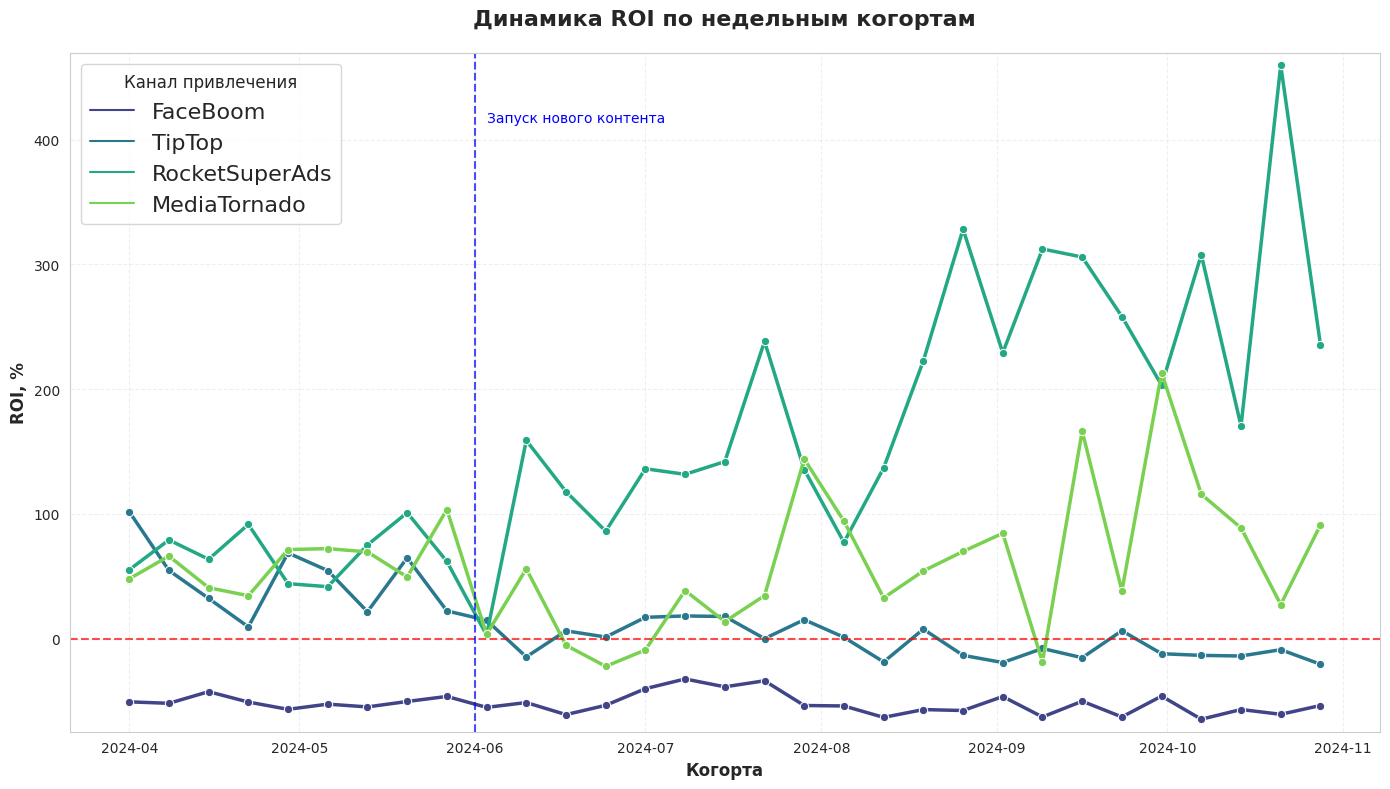

In [40]:
# Считаем выручку
# Создаем столбец недельной гранулярности 
orders['cohort_week'] = pd.to_datetime(orders['first_dt']).dt.to_period('W').dt.start_time

# Фильтруем датасет orders с учетом покупок, совершенных за первые 28 дней (включительно)
orders_28days = orders[orders['lifetime'] < 28]

# Агрегируем выручку
orders_28days_group = orders_28days.groupby(['cohort_week', 'first_channel']).agg(
    revenue_28days =('revenue', 'sum')).reset_index()
    
# Объединяем с расходы и выручку
metrics = pd.merge(
    profiles_cohorts_weekly,
    orders_28days_group[['cohort_week', 'first_channel', 'revenue_28days']], 
    on=['cohort_week', 'first_channel'], 
    how='left'
)
# Рассчитываем метрики
metrics['cac_mean'] = metrics['cost_weekly_sum']/metrics['users_weekly']
metrics['ltv_28d'] = metrics['revenue_28days']/metrics['users_weekly']
metrics['roi'] = ((metrics['ltv_28d'] - metrics['cac_mean']) / metrics['cac_mean']) * 100

# Сортируем каналы 
custom_order = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'MediaTornado']
metrics['first_channel'] = pd.Categorical(
    metrics['first_channel'],
    categories=custom_order,
    ordered=True
)
metrics = metrics.sort_values('first_channel')
 
# Визуализируем
plt.style.use('default')
sns.set_style("whitegrid")

# Параметры для каждого графика
plot_metrics = ['cac_mean', 'ltv_28d', 'roi']
titles = ['Динамика среднего CAC по недельным когортам', 
          'Динамика LTV (28 дней) по недельным когортам', 
          'Динамика ROI по недельным когортам']
y_labels = ['CAC, USD', 'LTV, USD', 'ROI, %']
palette = 'viridis'

for metric, title, ylabel in zip(plot_metrics, titles, y_labels):
    plt.figure(figsize=(14, 8))
    
    ax = sns.lineplot(
        data=metrics,
        x='cohort_week',
        y=metric,
        hue='first_channel',
        palette=palette,
        linewidth=2.5,
        marker='o',
        hue_order=custom_order
    )
    ax.set_title(title, fontsize=16, pad=20, fontweight='bold')
    ax.set_xlabel('Когорта', fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.xticks(ha='center', fontsize=10)
    # Горизонтальная линия для ROI
    if metric == 'roi':
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.7) 
    plt.legend(title='Канал привлечения', loc='upper left', fontsize=16, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    # Автоматическое масштабирование оси Y 
    if metric == 'roi':
        plt.ylim(metrics['roi'].min() - 10, metrics['roi'].max() + 10)
        
    # Добавляем вертикальную линию на июнь 2024
    june_2024 = pd.to_datetime('2024-06-01')
    ax.axvline(x=june_2024, color='blue', linestyle='--', alpha=0.7)

    # Добавляем аннотацию к вертикальной линии
    ax.text(june_2024 + pd.Timedelta(days=2), 
        ax.get_ylim()[1]*0.9, 
        'Запуск нового контента',
        ha='left', va='top', fontsize=10, color='blue')

    plt.tight_layout()
    plt.show()

Недельные затраты на маркетинг очень существенно растут для канала TipTop с начала лета: с 400USD в июне до 1900USD в ноябре. Динамика CAC растет соответственно, ступенчато фиксированно, что говорит о расчете на пользователя в финансировании. В апреле мае 1USD, июнь 1.5USD, июль 1.7USD, август 2.2USD, сентябрь 2.4USD, октябрь-ноябрь 2.8USD.

LTV пользователей привлеченных по каналу TipTop растет на всем периоде соответственно увеличению финансирования в этот канал: для первой апрельской когорты 0.5USD, для третьей октябрьской максимальный за весь период 2.6 USD. Для 2-й когорты июля наблюдается резкий скачок с 1.3USD до 2.3USD, что коррелирует с этапом повышения CAC.
Хорошие показатели LTV для когорт RocketSuperAds: с 0.4USD до 1.5USD он вырос за начальный период апреля и в дальнейшем держится на уровне 1.5USD (+/-0.2) до конца исследуемого периода. Примечательно, что финансирование этого канала понижалось дважды за общий период, что практически не повлияло на LTV.
Когорты FaceBoom и MediaTornado имеют низкие показатели LTV в среднем около 0.5USD. Небольшое увеличение до 0.8USD наблюдается для когорт июля, привлеченных по каналу FaceBoom. Фиксированное повышение CAC в июне для FaceBoom не произвело значительного позитивного эффекта на LTV, в августовских и последующих когортах этот показатель упал до уровня когорт начального периода.

ROI канала RocketSuperAds лидирует и в целом растет (с 50% для апрельских до 450 % для когорт до конца октября), несмотря на то, что финансирование этого канала дважды понижалось.
Возврат инвестиций для MediaTornado также положителен практически на всем периоде в диапазоне 50-200 %.
FaceBoom имеет отрицательный ROI для когорт всего периода, около -60%.
Канал TipTop для когорт начала периода показывал лучшие значения ROI около 100%, в июне упал до 0% снижаясь к концу периода до -10%.

### 📊 Промежуточные выводы: Анализ каналов привлечения

#### 🔍 Детализированная характеристика каналов

**🔴 FaceBoom** (лидер по объему, но аутсайдер по эффективности)
- 👥 **Пользователи**: 28,401 (37% от общего привлечения)
- 📉 **Retention**: ≤2% (критически низкий)
- ↘️ **Конверсия**: 11% → 9% (снижение)
- 💰 **LTV**: ~0.5 USD (макс 0.8 USD в июле)
- 📈 **CAC**: Рост с 1.0 USD до 1.5 USD+
- ❌ **ROI**: Постоянно отрицательный (-60% в среднем)
- ⚠️ **Проблема**: Пользователи "однодневки" - приходят, но не возвращаются

**🟠 TipTop** (парадокс: лучшая аудитория, но ухудшающаяся окупаемость)
- 👥 **Пользователи**: 18,118 (24% привлечения)
- 📈 **Retention**: 10-15% → 25-35% (значительный рост с июня)
- ↗️ **Конверсия**: 10% → 14% (лучший показатель)
- 💰 **LTV**: 0.5 USD → 2.6 USD (максимальный рост)
- 📉 **CAC**: 1.0 USD → 2.8 USD (самый быстрый рост затрат)
- 📊 **ROI**: +100% (апрель) → -10% (октябрь)
- ❓ **Феномен**: Рост качества аудитории, но CAC растет быстрее LTV

**🟢 RocketSuperAds** (скрытый чемпион по эффективности)
- 👥 **Пользователи**: 14,257 (18% привлечения)
- ↔️ **Retention**: 10-15% (стабильно)
- ↔️ **Конверсия**: ~8% (стабильно)
- 💰 **LTV**: 0.4 USD → 1.5 USD (плато)
- 📉 **CAC**: Снижался дважды при стабильном LTV
- 📈 **ROI**: +50% → +450% (октябрь)
- 💎 **Особенность**: Устойчивая эффективность при сокращении бюджета

**🟢 MediaTornado** (стабильно окупаемый, но маломасштабный)
- 👥 **Пользователи**: 14,080 (18% привлечения)
- ↔️ **Retention**: 10-15% (стабильно)
- ↘️ **Конверсия**: ~4% (самая низкая)
- 💰 **LTV**: ~0.5 USD
- ↔️ **CAC**: Низкий и стабильный
- 📈 **ROI**: +50-200% (постоянно положительный)
- 🎯 **Особенность**: Предсказуемая окупаемость при скромных масштабах

#### 💰 Анализ окупаемости за 28 дней

**🚫 Неокупаемые каналы:**

**🔴 FaceBoom**:
   - ⚠️ Причины: 
     - Катастрофически низкое удержание (2%)
     - Снижение конверсии
   - ❓ **Гипотеза**: Аудитория не соответствует контенту приложения

**🟠 TipTop (когорты после июня)**:
   - ⚠️ Причины:
     - Экспоненциальный рост CAC (1.0 USD → 2.8 USD)
     - LTV не успевает за ростом затрат на привлечение
   - ❓ **Гипотеза**: Переинвестирование в канал снизило эффективность

**✅ Перспективные каналы:**

**🟢 RocketSuperAds**:
   - 📈 ROI до +450% 
   - ↔️ Стабильные метрики при сокращении бюджета

**🟢 MediaTornado**:
   - 📈 Стабильно положительный ROI
   - ↔️ Низкий, но предсказуемый результат
   - 🚀 **Потенциал**: Возможность масштабирования

#### 💡 Ключевые инсайты

**🔄 Парадокс TipTop**:
- После запуска спортивного контента (июнь):
  - 📈 DAU ↗ с 150 до 400
  - 📈 Retention ↗ с 15% до 35%
  - 📈 Конверсия ↗ с 10% до 14%
- Но ROI упал с +100% до -10% из-за:
  - 📉 Роста CAC в 2.8x быстрее роста LTV
  - 💸 Агрессивного увеличения бюджета (400 USD → 1900 USD)
- 🔍 **Вывод**: Улучшение продукта нивелировано нерациональным увеличением маркетинговых затрат

**💎 Феномен RocketSuperAds**:
- При снижении финансирования:
  - ↔️ LTV сохранился на уровне 1.5 USD
  - 📈 ROI вырос до 450%
- ❓ **Гипотеза**: Канал привлекает органически лояльную аудиторию

**⚠️ Системная проблема FaceBoom**:
- 📊 Максимальный объем привлечения
- 📉 Минимальное удержание
- 🔍 **Корень проблемы**: Несоответствие между рекламным предложением и реальным продуктом

**🔥 Главный парадокс проекта**:
- 💰 Массовый канал ≠ Эффективность
- 🎯 Низкобюджетные каналы ≠ Слабая отдача

<div class="alert alert-info"> Всё поправил

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитаем и визуализируем в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделим данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используем недели.

Сделаем вывод о том, за какой период окупаются вложения в эти источники.

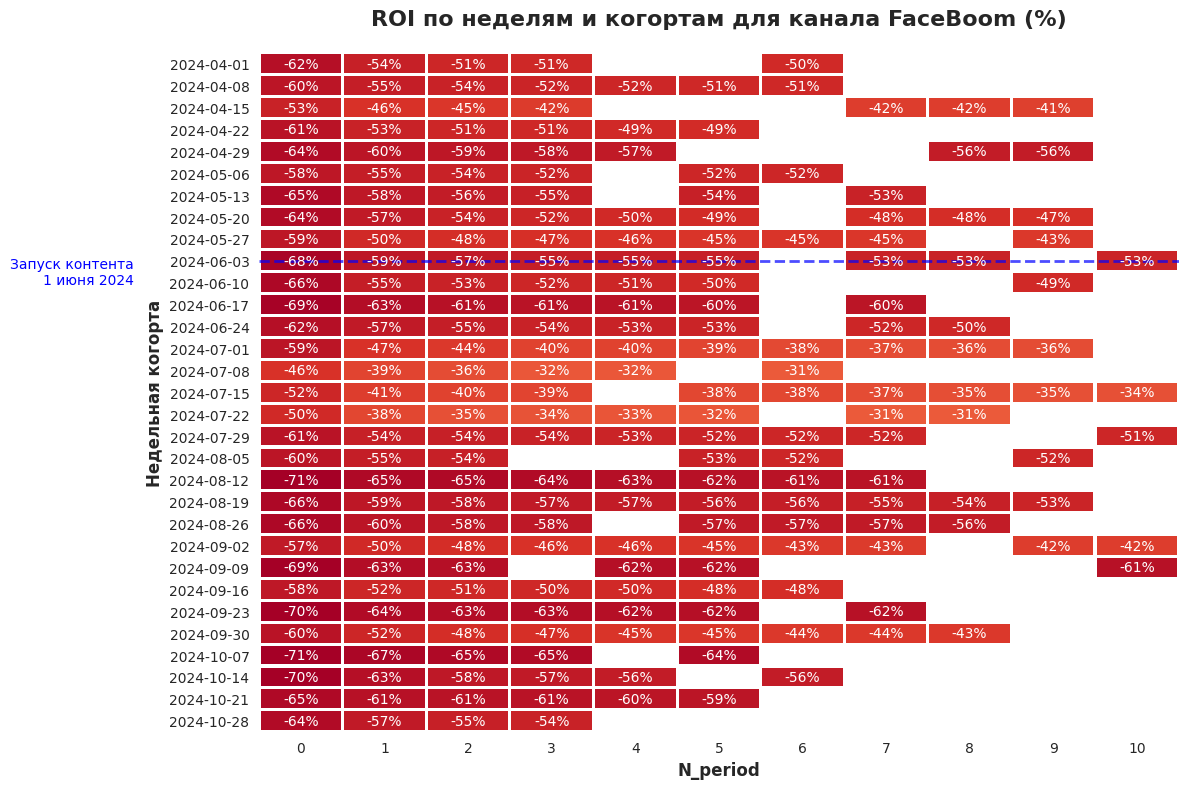

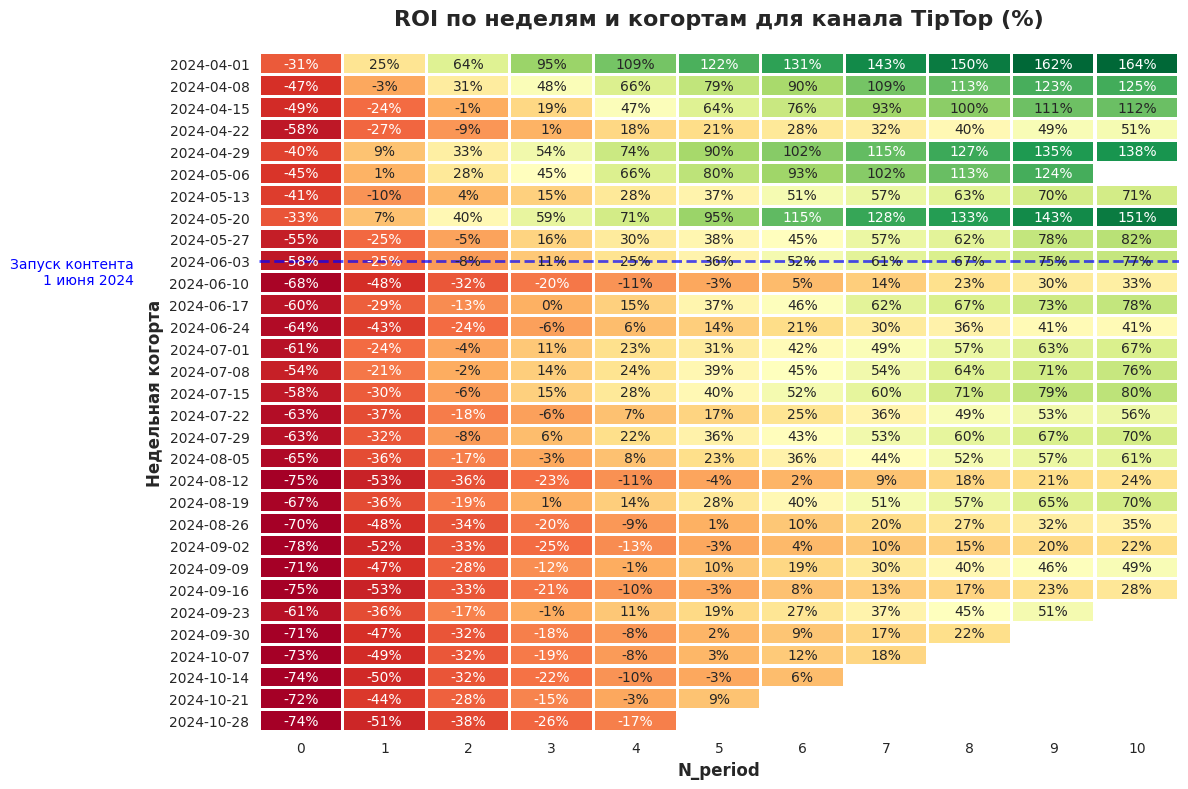

In [41]:
# Создадим столбец недельной гранулярности событий покупок
orders['event_week'] = pd.to_datetime(orders['event_dt']).dt.to_period('W').dt.start_time
#Отфильтруем период в 10 недель и каналы TipTop и FaceBoom
orders_70days = orders[
    (orders['lifetime'] < 70) & 
    (orders['first_channel'].isin(['TipTop', 'FaceBoom']))]
# Группируем с подсчетом недельной выручки для недельных когорт по каналам
orders_70days_group = orders_70days.groupby(['cohort_week', 'event_week', 'first_channel']).agg(
    revenue_weekly=('revenue', 'sum'),
    buyers_weekly=('user_id', 'nunique')
).reset_index()

# Рассчитываем номер недели относительно когорты
orders_70days_group['week_num'] = (orders_70days_group['event_week'] - orders_70days_group['cohort_week']).dt.days // 7

# Отфильтруем последние когорты для полноты и корректоности данных 
orders_70days_group = orders_70days_group[orders_70days_group['cohort_week'] < '2024-10-29']

# Сортируем по week_num и cohort_week для подсчета LTV
orders_70days_group = orders_70days_group.sort_values(
    by=['first_channel', 'cohort_week','week_num'], 
    ascending=[True, True, True]          
)

# Рассчитываем кумулятивную выручку для каждой когорты и канала
orders_70days_group['cumulative_revenue'] = orders_70days_group.groupby(
    ['first_channel', 'cohort_week']
)['revenue_weekly'].cumsum()

# Приджойним датасет с затратами по неделям
roi_70days = pd.merge(
    orders_70days_group, 
    profiles_cohorts_weekly,
    on = ['cohort_week', 'first_channel'],
    how='left')

# Считаем ROI
roi_70days['roi'] = (roi_70days['cumulative_revenue'] - roi_70days['cost_weekly_sum'])/roi_70days['cost_weekly_sum']*100

# Для корректного отображения процентов сдвинем запятую на 2 знака влево
roi_70days['roi'] = roi_70days['roi'] / 100

# Преобразуем формат даты для наглядного вида
roi_70days['cohort_week'] = roi_70days['cohort_week'].dt.strftime('%Y-%m-%d')

# Настройка стиля
plt.style.use('default')
sns.set_style("whitegrid")

# Параметры визуализации
HEATMAP_PARAMS = {
    'annot': True,
    'fmt': ".0%",  
    'cmap': "RdYlGn",
    'linewidths': 1.5,
    'cbar': False,
    'annot_kws': {"size": 10},
    'vmin': -0.7,  # -70%
    'vmax': 1.6    # 160%
}
# Построение тепловых карт для каждого канала
for channel in roi_70days['first_channel'].unique():
    # Подготовка данных
    channel_data = roi_70days[roi_70days['first_channel'] == channel]
    df_pivot = channel_data.pivot(index='cohort_week', columns='week_num', values='roi')
    # Замена 0 на NaN для лучшей визуализации
    df_pivot = df_pivot.replace(0, float('nan'))
    # Создание графика
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(df_pivot, **HEATMAP_PARAMS)
    ax.set_title(f'ROI по неделям и когортам для канала {channel} (%)', fontsize=16, pad=20, fontweight='bold')
    ax.set_xlabel('N_period', fontsize=12, fontweight='bold')
    ax.set_ylabel('Недельная когорта', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    # Добавляем горизонтальную линию запуска контента
    if launch_pos is not None:
        ax.axhline(y=launch_pos, color='blue', linestyle='--', linewidth=2, alpha=0.7)  
        # Добавляем аннотацию
        ax.text(-1.5, launch_pos + 0.5, 'Запуск контента\n1 июня 2024',
               ha='right', va='center', color='blue', fontsize=10,
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    
    plt.tight_layout()
    plt.show()

Вложения в канал FaceBoom не окупаются за 11 недель. Даже на 11 неделе для всех когорт не наблюдается увеличения ROI, которое указывало бы на окупаемость в большем периоде. В среднем -65% для периода 0 и -45% для периода 10. Только 3 когорты июля показывают относительное улучшение -50% для периода 0 и -35% для периода 10. При этом, учитывая очень низкий Retention, вложения в этот канал не окупятся никогда: приложение раньше потеряет пользователей, чем они принесут окупаемую прибыль.

Канал TipTop показывает более обнадеживающие значения ROI на периоде 11 недель. Лучшие показатели окупаемости наблюдаются у когорт апреля-мая: ROI выходит в плюс уже на 2-3 неделе. Однако с увеличением инвестиций в канал период окупаемости также увеличивается до 4-5 недель для летних когорт и до 5-6 недель для осенних.

### 📊 Промежуточные выводы: Окупаемость каналов

#### 🔴 **FaceBoom — хронически убыточный канал**
- ❌ Ни одна когорта не вышла в плюс даже за 11 недель
- 📉 Максимальное "улучшение": -35% (июльские когорты)
- ⚠️ **Главная проблема**: Катастрофически низкий retention (≤2%)  
  → 👋 Пользователи уходят раньше, чем успевают окупиться
- 🚨 **Рекомендация**: Немедленное сокращение бюджета на 80-100%

#### 🟠 **TipTop — динамика окупаемости**
**Ранние когорты (апрель-май)**:
- ⏱️ Окупаемость за 2-3 недели
- 📈 К 11-й неделе ROI +164% (максимум)

**Летние когорты (июнь-август)**:
- ⏱️ Окупаемость за 4-5 недель
- 📈 К 11-й неделе ROI +80%

**Осенние когорты (октябрь-ноябрь)**:
- ⏱️ Окупаемость за 5-6 недель
- 📈 К 11-й неделе ROI +46%

#### 🔍 **Причины удлинения окупаемости TipTop**
1. 💸 **Рост CAC**: 1.5 USD → 2.8 USD (+87%)
2. 👥 **Изменение поведения**:
   - 🐢 Медленнее осваивают платные функции
   - 👨👩👧👦 Сдвиг в демографии аудитории
3. ⚔️ **Конкуренция**: Усиление активности в нише ЗОЖ-контента

> 📌 **Ключевой инсайт**: Качество аудитории TipTop улучшилось, но маркетинговые затраты росли быстрее, чем монетизация. Требуется оптимизация CAC и ускорение конверсии.

## Выводы и рекомендации

### 🔍 **Аудитория продукта**  
- **FaceBoom**:  

  📊 *37% трафика* | ⚠️ **Критически низкие метрики**:  
  - Stickiness: ~4%  
  - Retention: 2%  
  - LTV/CAC: -60% ROI  


- **TipTop** (аудитория ЗОЖ): 

  📊 *24% трафика* | 💥 Рост DAU | 💖 **Высокая лояльность**:  
  - Retention: ↗ до 35%  
  - Конверсия: 14%  
  ⚠️ **Проблема**: Рост CAC съел прибыль  
  

- **RocketSuperAds & MediaTornado**: 

  📊 *По 18% трафика* | ✅ **Стабильная экономика**:  
  - ROI: +50-450%  
  - Устойчивы к изменениям бюджета  

---

### 📊 **Распределение маркетинговых затрат**  
```diff
+ Эффективные каналы (18%+18% = 36% трафика)
- Убыточные каналы (37%+24% = 61% трафика)
```

| Канал          | % Трафика | Бюджет | ROI       | Статус       |
|----------------|-----------|--------|-----------|--------------|
| **FaceBoom**   | 37%       | 1,100 USD | 🔴 -60%   | Убыточный    |
| **TipTop**     | 24%       | 1,900 USD | 🟠 -10%*  | Риск убытков |
| **Rocket**     | 18%       | 130 USD   | 🟢 +450%  | Перспективный|
| **Media**      | 18%       | 120 USD   | 🟢 +200%  | Стабильный   |

> *Для новых когорт (у ранних ROI +100%)

---

### 📌 **Характеристика каналов**  

#### **FaceBoom** 🔴  
| **✅ Сильные стороны**       | **⚠️ Слабые стороны**         | **💡 Причины неокупаемости** |
|----------------------------|------------------------------|----------------------------|
| - Максимальный приток пользователей | - Аудитория ≠ продукту       | - Пользователи "однодневки" |
| - Высокая конверсия (11%)  | - Retention 2% (катастрофа)  | - Не генерируют LTV        |
|                            | - Stickiness 4% (ниже рынка) | - Ложные ожидания от рекламы|

---

#### **TipTop** 🟠  
| **✅ Сильные стороны**          | **⚠️ Слабые стороны**         | **💡 Причины проблем**      |
|-------------------------------|------------------------------|----------------------------|
| - Лучший Retention (35%)      | - CAC ↗ 180%                 | - Переинвестирование       |
| - Рост конверсии (14%)        | - Период окупаемости ↗ 6 нед | - Без оптимизации ставок   |
| - Реакция на спорт-контент    | - LTV не успевает за CAC     | - Конкурентное давление    |
| - Лидер по DAU                |                              |                            |

---

#### **RocketSuperAds** 🟢  
| **✅ Сильные стороны**          | **⚠️ Слабые стороны**      |
|-------------------------------|---------------------------|
| - Максимальный ROI (+450%)    | -                         |
| - Стабильный LTV (1.5 USD)    | - Ограниченный масштаб    |
| - Эффективен при ↓ бюджете    |                           |

---

#### **MediaTornado** 🟢  
| **✅ Сильные стороны**          | **⚠️ Слабые стороны**      |
|-------------------------------|---------------------------|
| - Предсказуемая окупаемость   | - Низкая конверсия (4%)   |
| - Стабильный ROI (+50-200%)   | - Ограниченный масштаб    |
| - Низкий CAC (0.9-1.2 USD)    |                           |

---

### 💡 **Ключевые инсайты**  

1. **Парадокс роста DAU ≠ выручка**  
   - 37% трафика (FaceBoom) = "пустые" пользователи  
   - Качественный трафик (TipTop) окупается медленнее из-за ↗ CAC  


2. **Ошибка при запуске спортивного контента**  
   - Retention TipTop ↗ на 133% (15% → 35%)  
   - Но маркетинг не адаптировал ставки → CAC ↗ 180%  


3. **Дисбаланс бюджета**  
   - 🔴 Убыточные каналы: 92.3% бюджета (3,000 USD)  
   - 🟢 Окупаемые каналы: 7.7% бюджета (250 USD)  

---

### 🚀 **Рекомендации маркетингу**  

#### 1. **Срочное перераспределение бюджета**  
| Канал         | Текущий бюджет | Новый бюджет | Изменение | 
|---------------|----------------|--------------|-----------|
| FaceBoom      | 1,100 USD      | **300 USD**  | ▼ 73%     |
| TipTop        | 1,900 USD      | **600 USD**  | ▼ 68%     |
| RocketSuperAds| 130 USD        | **800 USD**  | ▲ 515%    |
| MediaTornado  | 120 USD        | **500 USD**  | ▲ 317%    |

**Эффект**:  
- 📈 Доля окупаемых каналов: ▲ с 7.7% до **59.1%**  
- 💸 Сокращение убытков: **1,260 USD/мес**  
  (FaceBoom: -480 USD → -180 USD | TipTop: -1,140 USD → -360 USD)  

---

#### 2. **Тактическая оптимизация каналов**  

- **Для FaceBoom 🔴**:  


  - 🛠️ A/B-тесты креативов (спорт vs. развлечения)  
  - ✉️ Ретаргетинг июльских когорт: "Вас ждут новые тренировки!"  
  - 🎯 Цель: Retention > 5%  


- **Для TipTop 🟠**:  


  - ⏱️ Ускоренная монетизация: триал-подписка за 0.99 USD в первые 72 часа  
  - 🎯 Оптимизация ставок (целевой CAC ≤ 1.5 USD)  
  - 📊 Фокус на аудиториях типа апрельских когорт  


- **Для Rocket/Media 🟢**: 


  - 📈 Плавное масштабирование (Rocket+515%, Media+317%)  

---

### 💎 **Итоговый вывод** 

**Стагнация выручки вызвана:**  
1. Доминированием "пустого" трафика FaceBoom (37%)  
2. Удлинением окупаемости TipTop из-за ↗ CAC  
3. Недофинансированием эффективных каналов (Rocket/Media)  


**Решение:**  
- 🔄 Сократить вложения в FaceBoom/TipTop на 2,100 USD  
- 🎯 Перенаправить 1,050 USD в Rocket/Media  
- 💡 Оптимизировать CAC для TipTop  


> ⏱️ **Ожидаемый результат**:  
> - +15% к выручке через 6 месяцев  
> - Сокращение CAC на 20%  
> - Общее снижение маркетинговых затрат на 32% (2,200 USD vs 3,250 USD)